In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from scipy.stats import pearsonr
from google.colab import drive

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load AAPL and preprocess
def load_preprocess(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Close']].dropna()
    df = df.set_index('Date')
    return df

aapl_df = load_preprocess(os.path.join(stock_path, "AAPL.csv"))
aapl_df = aapl_df['2012':'2024']

# Create list of files to compare
all_files = []

for folder in [stock_path, etf_path]:
    for f in os.listdir(folder):
        if f.endswith('.csv') and f != "AAPL.csv":
            all_files.append(os.path.join(folder, f))

# Compute correlations
results = []

for filepath in tqdm(all_files):
    try:
        ticker = os.path.basename(filepath).replace(".csv", "")
        df = load_preprocess(filepath)
        df = df['2012':'2024']

        # Align dates
        combined = pd.concat([aapl_df, df], axis=1, join='inner', keys=['AAPL', ticker])
        combined.columns = ['AAPL', 'Other']

        if len(combined) > 100:  # Ensure enough data to be meaningful
            corr, _ = pearsonr(combined['AAPL'], combined['Other'])
            results.append({'Ticker': ticker, 'Correlation': corr})
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        continue

# Create DataFrame
correlation_df = pd.DataFrame(results).sort_values(by='Correlation', ascending=False)

# Display top results
print(correlation_df.head())


 11%|█         | 1130/10388 [03:41<05:09, 29.88it/s]/tmp/ipython-input-560859113.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['AAPL'], combined['Other'])
 24%|██▎       | 2450/10388 [05:02<07:16, 18.19it/s]/tmp/ipython-input-560859113.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['AAPL'], combined['Other'])
 55%|█████▍    | 5694/10388 [07:56<06:34, 11.89it/s]/tmp/ipython-input-560859113.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['AAPL'], combined['Other'])
100%|██████████| 10388/10388 [35:06<00:00,  4.93it/s]

     Ticker  Correlation
9436   AAPX     0.994730
9438   AAPY     0.991877
6784    XLK     0.986730
9434   AAPU     0.986081
2313   MSFT     0.985843


In [ ]:
print(correlation_df.head(20))
correlation_df.to_csv('/content/drive/MyDrive/CW_backup/aapl_correlations.csv', index=False)

     Ticker  Correlation
9436   AAPX     0.994730
9438   AAPY     0.991877
6784    XLK     0.986730
9434   AAPU     0.986081
2313   MSFT     0.985843
6302   STIP     0.985268
6669   VTIP     0.985141
6615    VGT     0.984910
6946   LEAD     0.983790
7877   FTEC     0.983441
8020   GRID     0.982579
8434    IXN     0.982574
382    TTEK     0.982006
8578   APLY     0.981812
8445    IYW     0.981572
4176   DSGX     0.981325
6818    XSD     0.981296
4513   FAST     0.980748
8335    IOO     0.980467
2712   ODFL     0.980306


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from scipy.stats import pearsonr
from google.colab import drive

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load AAPL and preprocess
def load_preprocess(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Close']].dropna()
    df = df.set_index('Date')
    return df

aapl_df = load_preprocess(os.path.join(stock_path, "JPM.csv"))
aapl_df = aapl_df['2012':'2024']

# Create list of files to compare
all_files = []

for folder in [stock_path, etf_path]:
    for f in os.listdir(folder):
        if f.endswith('.csv') and f != "JPM.csv":
            all_files.append(os.path.join(folder, f))

# Compute correlations
results = []

for filepath in tqdm(all_files):
    try:
        ticker = os.path.basename(filepath).replace(".csv", "")
        df = load_preprocess(filepath)
        df = df['2012':'2024']

        # Align dates
        combined = pd.concat([aapl_df, df], axis=1, join='inner', keys=['JPM', ticker])
        combined.columns = ['JPM', 'Other']

        if len(combined) > 100:  # Ensure enough data to be meaningful
            corr, _ = pearsonr(combined['JPM'], combined['Other'])
            results.append({'Ticker': ticker, 'Correlation': corr})
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        continue

# Create DataFrame
correlation_df = pd.DataFrame(results).sort_values(by='Correlation', ascending=False)

# Display top results
print(correlation_df.head(20))
correlation_df.to_csv('/content/drive/MyDrive/CW_backup/jpm_correlations.csv', index=False)

 11%|█         | 1129/10388 [01:24<03:01, 50.95it/s]/tmp/ipython-input-2547670452.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['JPM'], combined['Other'])
 24%|██▎       | 2450/10388 [01:50<02:27, 53.69it/s]/tmp/ipython-input-2547670452.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['JPM'], combined['Other'])
 55%|█████▍    | 5697/10388 [02:59<01:32, 50.46it/s]/tmp/ipython-input-2547670452.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['JPM'], combined['Other'])
100%|██████████| 10388/10388 [04:11<00:00, 41.22it/s]

     Ticker  Correlation
8794   BRNY     0.993127
7372   PJFV     0.990750
8084   HDUS     0.989527
9104   DFSU     0.988892
8587   APUE     0.988840
8108   HIDV     0.988486
6843   YALL     0.988337
7930   GABF     0.988182
8438    IYF     0.988053
6530   USCA     0.987888
9015   CVLC     0.987577
8627   AVGE     0.987077
6624    VIS     0.987060
6532   USCL     0.986904
7580   RDVI     0.986902
9053   DCOR     0.986785
7305    PBL     0.986626
8478   JHDV     0.986561
6306   STRV     0.986381
8010    GOP     0.986237


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from scipy.stats import pearsonr
from google.colab import drive

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load AAPL and preprocess
def load_preprocess(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Close']].dropna()
    df = df.set_index('Date')
    return df

aapl_df = load_preprocess(os.path.join(stock_path, "NVDA.csv"))
aapl_df = aapl_df['2012':'2024']

# Create list of files to compare
all_files = []

for folder in [stock_path, etf_path]:
    for f in os.listdir(folder):
        if f.endswith('.csv') and f != "NVDA.csv":
            all_files.append(os.path.join(folder, f))

# Compute correlations
results = []

for filepath in tqdm(all_files):
    try:
        ticker = os.path.basename(filepath).replace(".csv", "")
        df = load_preprocess(filepath)
        df = df['2012':'2024']

        # Align dates
        combined = pd.concat([aapl_df, df], axis=1, join='inner', keys=['NVDA', ticker])
        combined.columns = ['NVDA', 'Other']

        if len(combined) > 100:  # Ensure enough data to be meaningful
            corr, _ = pearsonr(combined['NVDA'], combined['Other'])
            results.append({'Ticker': ticker, 'Correlation': corr})
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        continue

# Create DataFrame
correlation_df = pd.DataFrame(results).sort_values(by='Correlation', ascending=False)

# Display top results
print(correlation_df.head(20))
correlation_df.to_csv('/content/drive/MyDrive/CW_backup/nvda_correlations.csv', index=False)

 11%|█         | 1129/10388 [01:27<03:16, 47.13it/s]/tmp/ipython-input-2923586258.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['NVDA'], combined['Other'])
 24%|██▎       | 2448/10388 [01:53<03:29, 37.95it/s]/tmp/ipython-input-2923586258.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['NVDA'], combined['Other'])
 55%|█████▍    | 5694/10388 [02:58<01:32, 50.94it/s]/tmp/ipython-input-2923586258.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['NVDA'], combined['Other'])
100%|██████████| 10388/10388 [04:09<00:00, 41.69it/s]

     Ticker  Correlation
7211   NVDY     0.998417
7209   NVDX     0.989709
7212   NVDL     0.989494
7208   NVDU     0.988948
6198   SNPG     0.985906
8411   IWFG     0.985464
8954   CLSE     0.985282
8069   HAPI     0.985018
6838   XUSP     0.984929
6533    USD     0.984576
6115   SFLR     0.983655
8096   HEQT     0.983530
6306   STRV     0.983121
8477   JGRO     0.982874
7088   MODL     0.982504
7305    PBL     0.982376
6022   RVRB     0.982351
6548   USNZ     0.982138
6843   YALL     0.982077
7070   MKAM     0.981806


In [ ]:
import pandas as pd
import os
from tqdm import tqdm
from scipy.stats import pearsonr
from google.colab import drive

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load AAPL and preprocess
def load_preprocess(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Close']].dropna()
    df = df.set_index('Date')
    return df

aapl_df = load_preprocess(os.path.join(etf_path, "SPY.csv"))
aapl_df = aapl_df['2012':'2024']

# Create list of files to compare
all_files = []

for folder in [stock_path, etf_path]:
    for f in os.listdir(folder):
        if f.endswith('.csv') and f != "SPY.csv":
            all_files.append(os.path.join(folder, f))

# Compute correlations
results = []

for filepath in tqdm(all_files):
    try:
        ticker = os.path.basename(filepath).replace(".csv", "")
        df = load_preprocess(filepath)
        df = df['2012':'2024']

        # Align dates
        combined = pd.concat([aapl_df, df], axis=1, join='inner', keys=['SPY', ticker])
        combined.columns = ['SPY', 'Other']

        if len(combined) > 100:  # Ensure enough data to be meaningful
            corr, _ = pearsonr(combined['SPY'], combined['Other'])
            results.append({'Ticker': ticker, 'Correlation': corr})
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        continue

# Create DataFrame
correlation_df = pd.DataFrame(results).sort_values(by='Correlation', ascending=False)

# Display top results
print(correlation_df.head(20))
correlation_df.to_csv('/content/drive/MyDrive/CW_backup/spy_correlations.csv', index=False)

 11%|█         | 1129/10388 [01:35<03:19, 46.43it/s]/tmp/ipython-input-1031130709.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['SPY'], combined['Other'])
 24%|██▎       | 2447/10388 [02:06<04:08, 31.90it/s]/tmp/ipython-input-1031130709.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['SPY'], combined['Other'])
 55%|█████▍    | 5694/10388 [03:20<01:39, 47.05it/s]/tmp/ipython-input-1031130709.py:46: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(combined['SPY'], combined['Other'])
100%|██████████| 10388/10388 [04:40<00:00, 37.04it/s]

     Ticker  Correlation
6641    VOO     0.999997
8402    IVV     0.999996
6239   SPLG     0.999985
6255   SPTM     0.999931
6306   STRV     0.999886
6023   RVRB     0.999855
6677     VV     0.999815
8050   GUSA     0.999790
6638   VONE     0.999750
8587   APUE     0.999745
7495   QDPL     0.999728
8407    IWB     0.999716
6279   SPYX     0.999714
8465   JCTR     0.999713
7053    MGC     0.999686
6066   SCHK     0.999668
8413    IWL     0.999655
6532   USCL     0.999653
8037   GSLC     0.999649
6073   SCHX     0.999624


In [ ]:
nasdaq_info = pd.read_csv(
    "https://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt",
    sep="|"
)
nasdaq_info = nasdaq_info[['Symbol', 'ETF']].dropna()
nasdaq_info['ETF'] = nasdaq_info['ETF'].map({'Y': 'ETF', 'N': 'Stock'})
nasdaq_info['ETF or Stock'] = nasdaq_info['ETF']
nasdaq_info.drop(columns=['ETF'], inplace=True)
correlation_df = pd.read_csv("/content/drive/MyDrive/CW_backup/aapl_correlations.csv")
correlation_df.rename(columns={'Symbol': 'Ticker'}, inplace=True)
merged_df = correlation_df.merge(nasdaq_info, how="left", left_on="Ticker", right_on="Symbol")
merged_df.drop(columns=['Symbol'], inplace=True)
merged_df.to_csv("/content/drive/MyDrive/CW_backup/aapl_correlations_with_type.csv", index=False)

correlation_df = pd.read_csv("/content/drive/MyDrive/CW_backup/jpm_correlations.csv")
correlation_df.rename(columns={'Symbol': 'Ticker'}, inplace=True)
merged_df = correlation_df.merge(nasdaq_info, how="left", left_on="Ticker", right_on="Symbol")
merged_df.drop(columns=['Symbol'], inplace=True)
merged_df.to_csv("/content/drive/MyDrive/CW_backup/jpm_correlations_with_type.csv", index=False)

correlation_df = pd.read_csv("/content/drive/MyDrive/CW_backup/nvda_correlations.csv")
correlation_df.rename(columns={'Symbol': 'Ticker'}, inplace=True)
merged_df = correlation_df.merge(nasdaq_info, how="left", left_on="Ticker", right_on="Symbol")
merged_df.drop(columns=['Symbol'], inplace=True)
merged_df.to_csv("/content/drive/MyDrive/CW_backup/nvda_correlations_with_type.csv", index=False)

correlation_df = pd.read_csv("/content/drive/MyDrive/CW_backup/spy_correlations.csv")
correlation_df.rename(columns={'Symbol': 'Ticker'}, inplace=True)
merged_df = correlation_df.merge(nasdaq_info, how="left", left_on="Ticker", right_on="Symbol")
merged_df.drop(columns=['Symbol'], inplace=True)
merged_df.to_csv("/content/drive/MyDrive/CW_backup/spy_correlations_with_type.csv", index=False)

Mostly just etfs that are highly correlated. spy in centre, etfs that relate to spy and stocks connected?

# Load Graphs (and Save Them)

In [ ]:
pip install torch-geometric ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.0 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8e6cc9bbd86f42aebc33cbe85ac9631ce07d71874a6c65cdb988142b4e56fe8b
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


Check sufficient data exists:

In [ ]:
import os
import pandas as pd
from ta.momentum import RSIIndicator
from ta.trend import MACD

def load_stock(file_path):
    df = pd.read_csv(file_path, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()
    df = df[['Date', 'Close', 'RSI', 'MACD']]
    df = df[df['Date'] >= '2011-10-01']  # avoid NaNs from indicators
    df = df[df['Date'] <= '2024-12-31']
    return df

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

stock_folder = '/content/drive/MyDrive/CW_backup/stocks'
etf_folder = '/content/drive/MyDrive/CW_backup/etfs'

def has_data_before_2012(ticker, folder):
    file_path = os.path.join(folder, f"{ticker}.csv")
    if not os.path.exists(file_path):
        return False
    try:
        df = pd.read_csv(file_path, skiprows=3, header=None)
        df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
        df['Date'] = pd.to_datetime(df['Date'])
        return df['Date'].min() < pd.Timestamp("2012-01-01")
    except Exception as e:
        print(f"Error reading {ticker}: {e}")
        return False

invalid_stocks = [t for t in selected_stocks if has_data_before_2012(t, stock_folder) == False]
invalid_etfs = [t for t in selected_etfs if has_data_before_2012(t, etf_folder) == False]

print("Stocks without data before 2012:", invalid_stocks)
print("ETFs without data before 2012:", invalid_etfs)


Stocks without data before 2012: ['META']
ETFs without data before 2012: []


In [ ]:
import os
import pandas as pd
from ta.momentum import RSIIndicator
from ta.trend import MACD

def load_stock(file_path):
    df = pd.read_csv(file_path, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()
    df = df[['Date', 'Close', 'RSI', 'MACD']]
    df = df[df['Date'] >= '2018-01-01'] # avoid nas from tech indicators
    df = df[df['Date'] <= '2024-12-31']
    return df

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

stock_folder = '/content/drive/MyDrive/CW_backup/stocks'
etf_folder = '/content/drive/MyDrive/CW_backup/etfs'

tickers = selected_stocks + selected_etfs
panel = {}

for ticker in tickers:
    folder = stock_folder if ticker in selected_stocks else etf_folder
    file_path = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(file_path):
        try:
            panel[ticker] = load_stock(file_path)
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")

# Select only common dates
from functools import reduce

common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date'), [df[['Date']] for df in panel.values()])
common_dates = pd.to_datetime(common_dates['Date'].unique())
common_dates = sorted(list(common_dates))

for ticker in panel:
    panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

from torch_geometric.data import Data
import torch

tickers = list(panel.keys())
target_stocks = ['AAPL', 'JPM', 'NVDA', 'SPY']
target_indices = [tickers.index(t) for t in target_stocks]

def fully_connected_edges(num_nodes):
    row = torch.arange(num_nodes).repeat_interleave(num_nodes)
    col = torch.arange(num_nodes).repeat(num_nodes)
    return torch.stack([row, col], dim=0)

graph_list = []
num_days = len(common_dates) - 1  # Leave 1 for next-day label

for day in range(num_days):
    x = []
    y = []

    for ticker in tickers:
        row = panel[ticker].iloc[day]
        x.append([row['Close'], row['RSI'], row['MACD']])

    for target in target_stocks:
        y.append(panel[target].iloc[day + 1]['Close'])  # Next day

    x_tensor = torch.tensor(x, dtype=torch.float)
    y_tensor = torch.tensor(y, dtype=torch.float)
    x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
    y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

    edge_index = fully_connected_edges(len(tickers))
    target_tensor = torch.tensor(target_indices, dtype=torch.long)

    data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
    graph_list.append(data)

torch.save(graph_list, 'graph_list.pt')

In [ ]:
print(graph_list[0])
# Data(x=[num_nodes, 3], edge_index=[2, num_edges], y=[4], target_node_ids=[4])

Data(x=[79, 3], edge_index=[2, 6241], y=[4], target_node_ids=[4])


In [ ]:
import torch

for i, g in enumerate(graph_list):
    if torch.isnan(g.x).any():
        print(f"NaNs in x at graph {i}")
    if torch.isnan(g.y).any():
        print(f"NaNs in y at graph {i}")


TRAIN:

Epoch 01 | Train Loss: 20528.2826 | Test Loss: 27093.7446
Epoch 02 | Train Loss: 15270.0751 | Test Loss: 27059.1248
Epoch 03 | Train Loss: 15260.2334 | Test Loss: 27067.1157
Epoch 04 | Train Loss: 15251.6853 | Test Loss: 27069.7957
Epoch 05 | Train Loss: 15238.9349 | Test Loss: 27067.3643
Epoch 06 | Train Loss: 15233.9667 | Test Loss: 27068.2102
Epoch 07 | Train Loss: 15230.2046 | Test Loss: 27081.2361
Epoch 08 | Train Loss: 15239.1791 | Test Loss: 27080.0991
Epoch 09 | Train Loss: 15242.2108 | Test Loss: 27112.7581
Epoch 10 | Train Loss: 15260.8969 | Test Loss: 27079.1455
Epoch 11 | Train Loss: 15271.3235 | Test Loss: 27067.9521
Epoch 12 | Train Loss: 15294.7237 | Test Loss: 27051.2893
Epoch 13 | Train Loss: 15321.9073 | Test Loss: 27035.9827
Epoch 14 | Train Loss: 15356.3337 | Test Loss: 27002.4895
Epoch 15 | Train Loss: 15394.7495 | Test Loss: 26978.4148
Epoch 16 | Train Loss: 15434.8817 | Test Loss: 26961.1184
Epoch 17 | Train Loss: 15476.2045 | Test Loss: 26958.4336
Epoch 18 | Tra

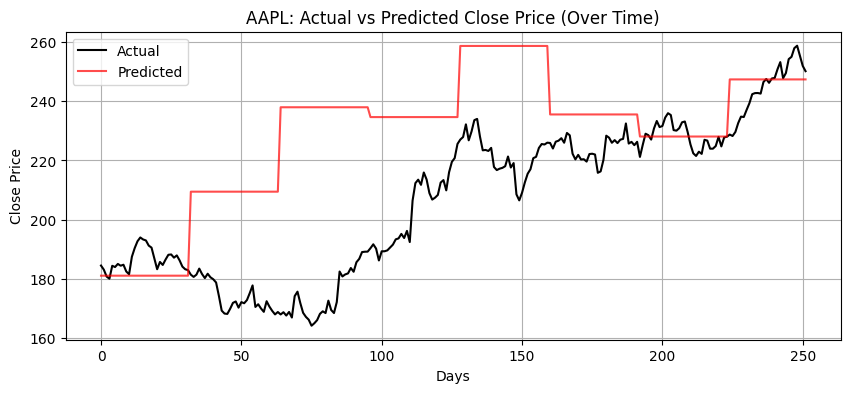

JPM — RMSE: 32.3309 | MAE: 27.3702 | MAPE: 13.92% | R²: -1.1182


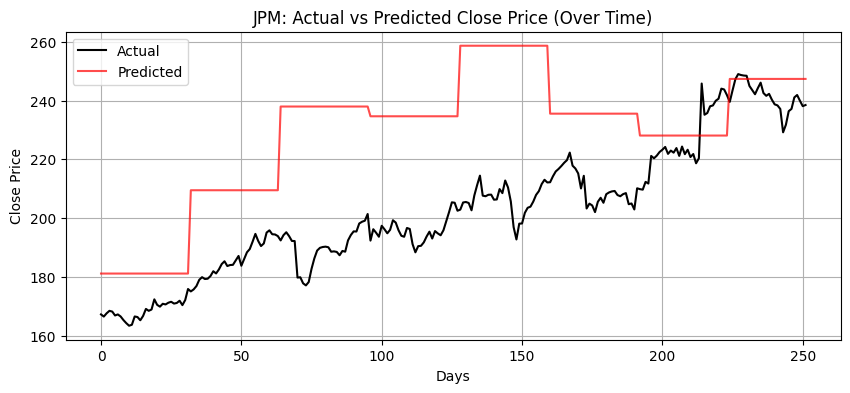

NVDA — RMSE: 122.5668 | MAE: 121.0160 | MAPE: 123.96% | R²: -19.7534


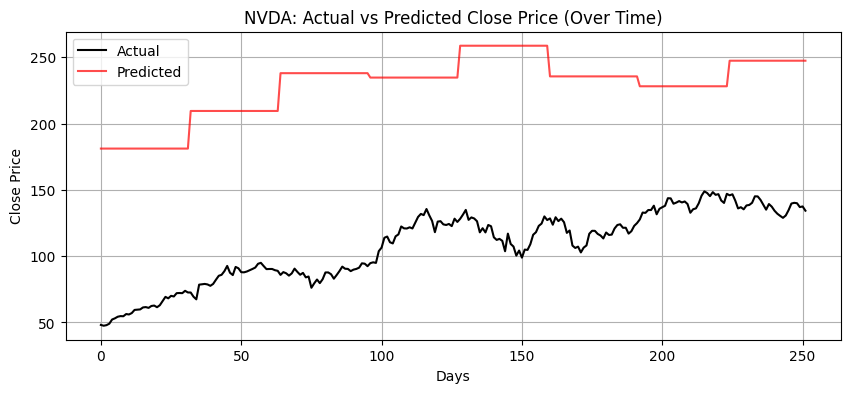

SPY — RMSE: 308.4163 | MAE: 307.0118 | MAPE: 57.28% | R²: -64.3913


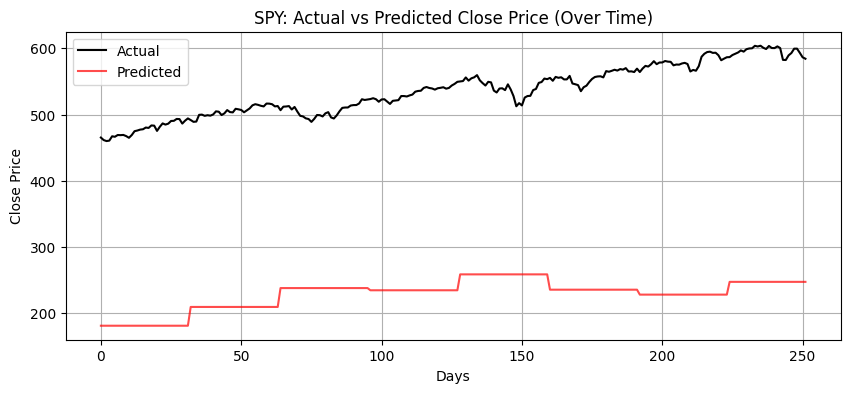

In [ ]:
import torch
from torch_geometric.data import Data

graph_list = torch.load("graph_list.pt", weights_only=False) # necessary.

test_days = 252

train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

from torch_geometric.loader import DataLoader

batch_size = 32
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each target stock

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))

        # Select only target nodes (e.g., AAPL, JPM, NVDA, SPY)
        target_nodes = data.target_node_ids
        x_target = x[target_nodes]

        return self.fc(x_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=3, hidden_channels=32, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data).squeeze()
        loss = loss_fn(out, data.y.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data).squeeze()
            loss = loss_fn(out, data.y.to(device))
            total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(30):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        pred = model(data).squeeze().cpu().numpy()
        predictions.extend(pred)
        actuals.extend(data.y.cpu().numpy())


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

# Reshape into [days, stocks]
n_stocks = 4  # AAPL, JPM, NVDA, SPY
predictions = predictions.reshape(-1, n_stocks)
actuals = actuals.reshape(-1, n_stocks)

# Stock labels
stock_names = ["AAPL", "JPM", "NVDA", "SPY"]

# Metrics per stock
for i, name in enumerate(stock_names):
    rmse = np.sqrt(mean_squared_error(actuals[:, i], predictions[:, i]))
    mae = mean_absolute_error(actuals[:, i], predictions[:, i])
    mape = np.mean(np.abs((actuals[:, i] - predictions[:, i]) / actuals[:, i])) * 100
    r2 = r2_score(actuals[:, i], predictions[:, i])

    print(f"{name} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

    # Plot over time
    plt.figure(figsize=(10, 4))
    plt.plot(actuals[:, i], label="Actual", color='black')
    plt.plot(predictions[:, i], label="Predicted", color='red', alpha=0.7)
    plt.title(f"{name}: Actual vs Predicted Close Price (Over Time)")
    plt.xlabel("Days")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()



Prediction same for every 30 days and also the same for each of these 4 stocks.

Epoch 01 | Train Loss: 19185.2902 | Test Loss: 27210.1985
Epoch 02 | Train Loss: 15164.1677 | Test Loss: 27181.6777
Epoch 03 | Train Loss: 15211.6460 | Test Loss: 27285.3601
Epoch 04 | Train Loss: 15220.3003 | Test Loss: 27296.0269
Epoch 05 | Train Loss: 15220.2584 | Test Loss: 27320.3271
Epoch 06 | Train Loss: 15223.8965 | Test Loss: 27326.5352
Epoch 07 | Train Loss: 15231.8944 | Test Loss: 27337.5188
Epoch 08 | Train Loss: 15239.6015 | Test Loss: 27341.0537
Epoch 09 | Train Loss: 15251.4812 | Test Loss: 27326.5647
Epoch 10 | Train Loss: 15265.7509 | Test Loss: 27299.2766
Epoch 11 | Train Loss: 15271.3481 | Test Loss: 27284.4597
Epoch 12 | Train Loss: 15293.2045 | Test Loss: 27240.4797
Epoch 13 | Train Loss: 15319.9977 | Test Loss: 27185.4888
Epoch 14 | Train Loss: 15338.7450 | Test Loss: 27148.1125
Epoch 15 | Train Loss: 15363.8438 | Test Loss: 27105.8823
Epoch 16 | Train Loss: 15383.9698 | Test Loss: 27095.5872
Epoch 17 | Train Loss: 15424.7384 | Test Loss: 27041.0918
Epoch 18 | Tra

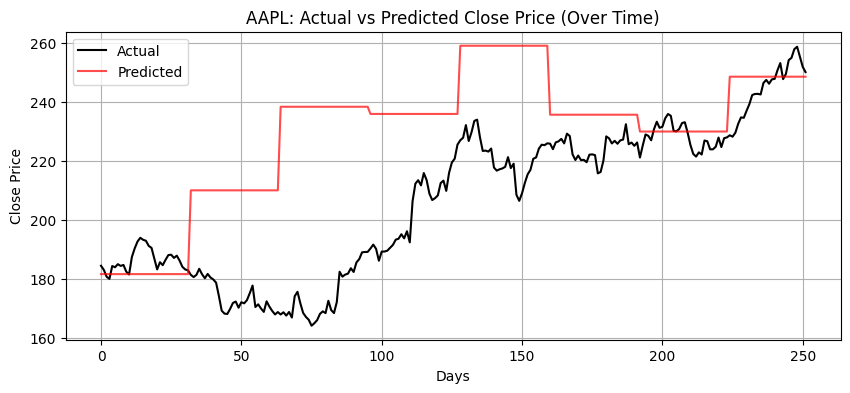

JPM — RMSE: 32.8584 | MAE: 28.0167 | MAPE: 14.25% | R²: -1.1879


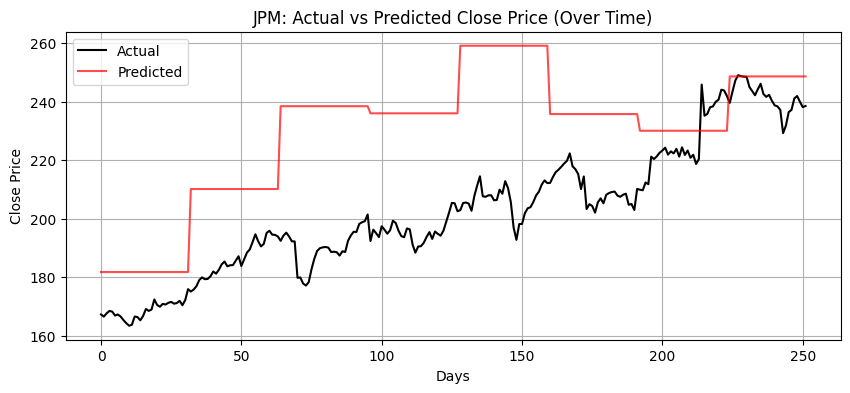

NVDA — RMSE: 123.3320 | MAE: 121.8526 | MAPE: 124.73% | R²: -20.0134


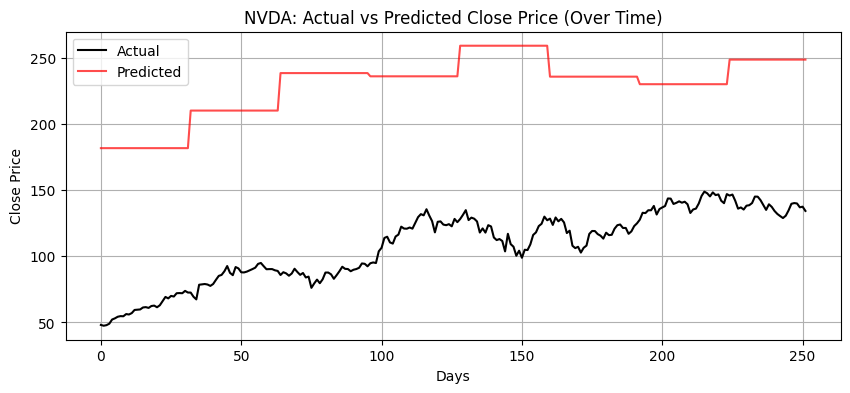

SPY — RMSE: 307.5516 | MAE: 306.1751 | MAPE: 57.13% | R²: -64.0251


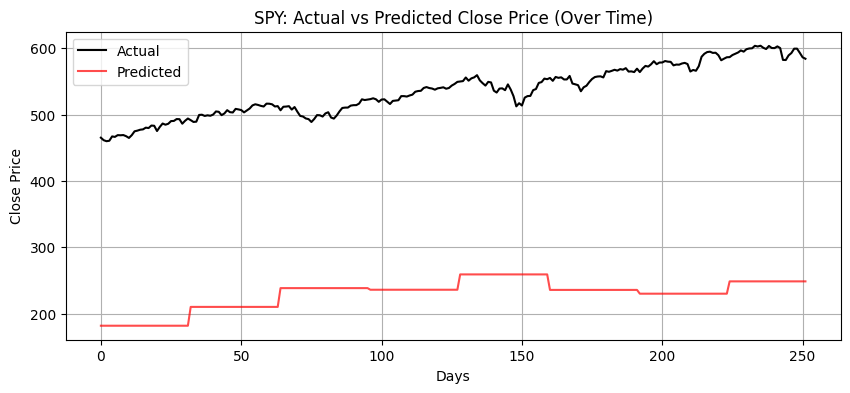

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
graph_list = torch.load("graph_list.pt", weights_only=False)  # necessary

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 32
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=3, hidden_channels=32, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # [num_nodes, 1]
        out_target = out[data.target_node_ids].squeeze()  # only target stocks
        loss = loss_fn(out_target, data.y.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            out_target = out[data.target_node_ids].squeeze()
            loss = loss_fn(out_target, data.y.to(device))
            total_loss += loss.item()
    return total_loss / len(loader)

for epoch in range(30):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Metrics and Plotting ===
predictions = np.array(predictions)
actuals = np.array(actuals)

n_stocks = len(train_graphs[0].target_node_ids)  # dynamic
predictions = predictions.reshape(-1, n_stocks)
actuals = actuals.reshape(-1, n_stocks)

stock_names = ["AAPL", "JPM", "NVDA", "SPY"]  # adjust if different

for i, name in enumerate(stock_names):
    rmse = np.sqrt(mean_squared_error(actuals[:, i], predictions[:, i]))
    mae = mean_absolute_error(actuals[:, i], predictions[:, i])
    mape = np.mean(np.abs((actuals[:, i] - predictions[:, i]) / actuals[:, i])) * 100
    r2 = r2_score(actuals[:, i], predictions[:, i])

    print(f"{name} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

    plt.figure(figsize=(10, 4))
    plt.plot(actuals[:, i], label="Actual", color='black')
    plt.plot(predictions[:, i], label="Predicted", color='red', alpha=0.7)
    plt.title(f"{name}: Actual vs Predicted Close Price (Over Time)")
    plt.xlabel("Days")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()


Try the graph but the only target is 1 stock: AAPL.

In [ ]:
import os
import pandas as pd
from ta.momentum import RSIIndicator
from ta.trend import MACD

def load_stock(file_path):
    df = pd.read_csv(file_path, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()
    df = df[['Date', 'Close', 'RSI', 'MACD']]
    df = df[df['Date'] >= '2018-01-01'] # avoid nas from tech indicators
    df = df[df['Date'] <= '2024-12-31']
    return df

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

stock_folder = '/content/drive/MyDrive/CW_backup/stocks'
etf_folder = '/content/drive/MyDrive/CW_backup/etfs'

tickers = selected_stocks + selected_etfs
panel = {}

for ticker in tickers:
    folder = stock_folder if ticker in selected_stocks else etf_folder
    file_path = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(file_path):
        try:
            panel[ticker] = load_stock(file_path)
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")

# Select only common dates
from functools import reduce

common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date'), [df[['Date']] for df in panel.values()])
common_dates = pd.to_datetime(common_dates['Date'].unique())
common_dates = sorted(list(common_dates))

for ticker in panel:
    panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

from torch_geometric.data import Data
import torch

tickers = list(panel.keys())
target_stocks = ['AAPL']
target_indices = [tickers.index(t) for t in target_stocks]

def fully_connected_edges(num_nodes):
    row = torch.arange(num_nodes).repeat_interleave(num_nodes)
    col = torch.arange(num_nodes).repeat(num_nodes)
    return torch.stack([row, col], dim=0)

graph_list = []
num_days = len(common_dates) - 1  # Leave 1 for next-day label

for day in range(num_days):
    x = []
    y = []

    for ticker in tickers:
        row = panel[ticker].iloc[day]
        x.append([row['Close'], row['RSI'], row['MACD']])

    for target in target_stocks:
        y.append(panel[target].iloc[day + 1]['Close'])  # Next day

    x_tensor = torch.tensor(x, dtype=torch.float)
    y_tensor = torch.tensor(y, dtype=torch.float)
    x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
    y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

    edge_index = fully_connected_edges(len(tickers))
    target_tensor = torch.tensor(target_indices, dtype=torch.long)

    data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
    graph_list.append(data)

torch.save(graph_list, 'graph_list_aapl.pt')

Epoch 01 | Train Loss: 32.8751 | Test Loss: 667.7282
Epoch 02 | Train Loss: 35.4203 | Test Loss: 801.0860
Epoch 03 | Train Loss: 30.6570 | Test Loss: 1016.3985
Epoch 04 | Train Loss: 32.8510 | Test Loss: 1542.2824
Epoch 05 | Train Loss: 37.9638 | Test Loss: 1624.5436
Epoch 06 | Train Loss: 39.8755 | Test Loss: 1524.8612
Epoch 07 | Train Loss: 50.9638 | Test Loss: 3247.2505
Epoch 08 | Train Loss: 49.2180 | Test Loss: 656.5628
Epoch 09 | Train Loss: 67.3754 | Test Loss: 795.0515
Epoch 10 | Train Loss: 74.9192 | Test Loss: 793.5537
Epoch 11 | Train Loss: 79.7636 | Test Loss: 808.6570
Epoch 12 | Train Loss: 70.6741 | Test Loss: 642.7470
Epoch 13 | Train Loss: 94.7483 | Test Loss: 2411.0210
Epoch 14 | Train Loss: 72.7178 | Test Loss: 2180.2091
Epoch 15 | Train Loss: 76.9278 | Test Loss: 1845.6337
Epoch 16 | Train Loss: 76.2279 | Test Loss: 1781.7816
Epoch 17 | Train Loss: 82.2754 | Test Loss: 1518.7354
Epoch 18 | Train Loss: 89.7643 | Test Loss: 1297.6782
Epoch 19 | Train Loss: 96.2153 | Te

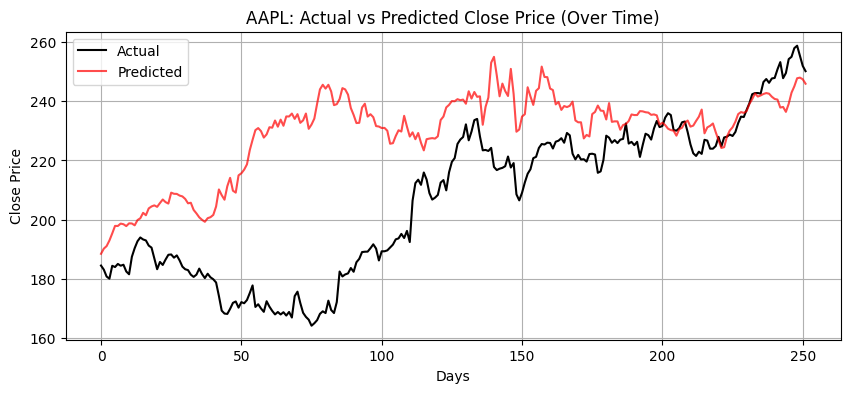

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
graph_list = torch.load("graph_list_aapl.pt", weights_only=False)  # necessary

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=3, hidden_channels=32, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(30):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Metrics and Plotting ===
predictions = np.array(predictions)
actuals = np.array(actuals)

n_stocks = len(train_graphs[0].target_node_ids)  # dynamic
# Reshape predictions and actuals to be [days, stocks]
predictions = predictions.reshape(-1, n_stocks)
actuals = actuals.reshape(-1, n_stocks)

stock_names = ["AAPL"]  # adjust if different

for i, name in enumerate(stock_names):
    rmse = np.sqrt(mean_squared_error(actuals[:, i], predictions[:, i]))
    mae = mean_absolute_error(actuals[:, i], predictions[:, i])
    mape = np.mean(np.abs((actuals[:, i] - predictions[:, i]) / actuals[:, i])) * 100
    r2 = r2_score(actuals[:, i], predictions[:, i])

    print(f"{name} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

    plt.figure(figsize=(10, 4))
    plt.plot(actuals[:, i], label="Actual", color='black')
    plt.plot(predictions[:, i], label="Predicted", color='red', alpha=0.7)
    plt.title(f"{name}: Actual vs Predicted Close Price (Over Time)")
    plt.xlabel("Days")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 01 | Train Loss: 38.6210 | Test Loss: 644.6311
Epoch 02 | Train Loss: 37.6890 | Test Loss: 746.1254
Epoch 03 | Train Loss: 32.0087 | Test Loss: 860.4463
Epoch 04 | Train Loss: 33.9170 | Test Loss: 1055.7177
Epoch 05 | Train Loss: 37.6620 | Test Loss: 1134.8809
Epoch 06 | Train Loss: 42.7002 | Test Loss: 1302.8127
Epoch 07 | Train Loss: 50.1599 | Test Loss: 1405.9294
Epoch 08 | Train Loss: 54.2154 | Test Loss: 1484.1320
Epoch 09 | Train Loss: 53.2920 | Test Loss: 1699.5702
Epoch 10 | Train Loss: 55.4800 | Test Loss: 1464.0908
Epoch 11 | Train Loss: 61.9105 | Test Loss: 1337.3637
Epoch 12 | Train Loss: 67.4186 | Test Loss: 1056.5614
Epoch 13 | Train Loss: 68.4232 | Test Loss: 1071.2547
Epoch 14 | Train Loss: 73.0103 | Test Loss: 1214.3975
Epoch 15 | Train Loss: 70.0043 | Test Loss: 1141.6744
Epoch 16 | Train Loss: 78.7425 | Test Loss: 1172.6988
Epoch 17 | Train Loss: 80.1504 | Test Loss: 982.5330
Epoch 18 | Train Loss: 82.6808 | Test Loss: 1011.9136
Epoch 19 | Train Loss: 85.7156 |

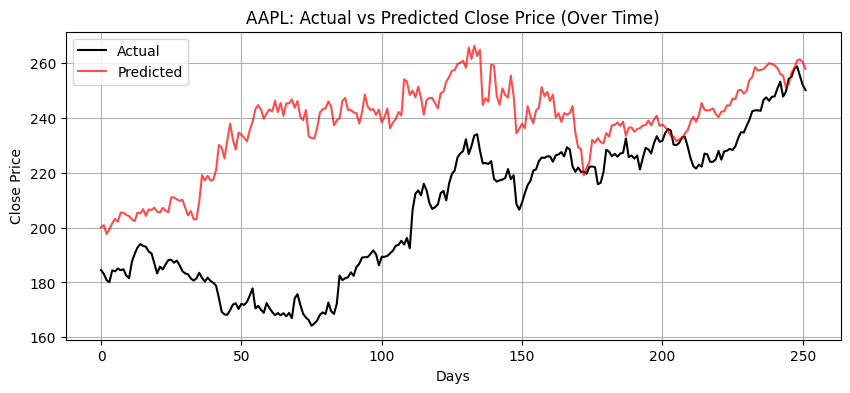

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
graph_list = torch.load("graph_list_aapl.pt", weights_only=False)  # necessary

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=3, hidden_channels=32, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(30):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Metrics and Plotting ===
predictions = np.array(predictions)
actuals = np.array(actuals)

n_stocks = len(train_graphs[0].target_node_ids)  # dynamic
# Reshape predictions and actuals to be [days, stocks]
predictions = predictions.reshape(-1, n_stocks)
actuals = actuals.reshape(-1, n_stocks)

stock_names = ["AAPL"]  # adjust if different

for i, name in enumerate(stock_names):
    rmse = np.sqrt(mean_squared_error(actuals[:, i], predictions[:, i]))
    mae = mean_absolute_error(actuals[:, i], predictions[:, i])
    mape = np.mean(np.abs((actuals[:, i] - predictions[:, i]) / actuals[:, i])) * 100
    r2 = r2_score(actuals[:, i], predictions[:, i])

    print(f"{name} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

    plt.figure(figsize=(10, 4))
    plt.plot(actuals[:, i], label="Actual", color='black')
    plt.plot(predictions[:, i], label="Predicted", color='red', alpha=0.7)
    plt.title(f"{name}: Actual vs Predicted Close Price (Over Time)")
    plt.xlabel("Days")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.show()

Losses just increase every time, doing something wrong :(

Try no rsi and macd, scaled close.

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]

    scaler = MinMaxScaler()
    df['Close'] = scaler.fit_transform(df[['Close']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(num_days):
        x = []
        y = []

        for ticker in tickers_in_panel:
            row = panel[ticker].iloc[day]
            x.append([row['Close']]) # Only scaled close price as feature

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day's scaled close price

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)


        edge_index = fully_connected_edges(len(tickers_in_panel))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, f'graph_list_{target_stock.lower()}_scaled_close.pt')

    print(f"Graph list saved for {target_stock} with scaled close prices.")

Graph list saved for AAPL with scaled close prices.


In [ ]:
print(graph_list)

[Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=[1]), Data(x=[79, 1], edge_index=[2, 6241], y=[1], target_node_ids=

Epoch 01 | Train Loss: 0.0520 | Test Loss: 0.0537
Epoch 02 | Train Loss: 0.0419 | Test Loss: 0.1241
Epoch 03 | Train Loss: 0.0406 | Test Loss: 0.0801
Epoch 04 | Train Loss: 0.0393 | Test Loss: 0.1236
Epoch 05 | Train Loss: 0.0395 | Test Loss: 0.1024
Epoch 06 | Train Loss: 0.0395 | Test Loss: 0.1573
Epoch 07 | Train Loss: 0.0393 | Test Loss: 0.1188
Epoch 08 | Train Loss: 0.0395 | Test Loss: 0.1176
Epoch 09 | Train Loss: 0.0396 | Test Loss: 0.1100
Epoch 10 | Train Loss: 0.0389 | Test Loss: 0.1189
Epoch 11 | Train Loss: 0.0392 | Test Loss: 0.1135
Epoch 12 | Train Loss: 0.0392 | Test Loss: 0.1452
Epoch 13 | Train Loss: 0.0399 | Test Loss: 0.1240
Epoch 14 | Train Loss: 0.0394 | Test Loss: 0.1399
Epoch 15 | Train Loss: 0.0391 | Test Loss: 0.1369
Epoch 16 | Train Loss: 0.0391 | Test Loss: 0.1173
Epoch 17 | Train Loss: 0.0392 | Test Loss: 0.1218
Epoch 18 | Train Loss: 0.0390 | Test Loss: 0.1433
Epoch 19 | Train Loss: 0.0392 | Test Loss: 0.1323
Epoch 20 | Train Loss: 0.0392 | Test Loss: 0.1827


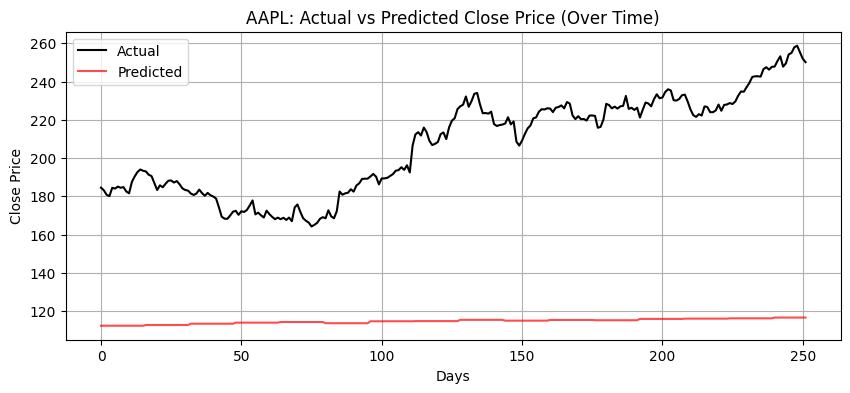

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 16 # Increased batch size
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=True) # Set shuffle to True
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False) # Keep shuffle False for testing

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=32, out_channels=1).to(device) # in_channels=1 for scaled close
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(50): # Increased epochs
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions_scaled = []
actuals_scaled = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target_scaled = out[data.target_node_ids].squeeze().cpu().numpy()
        predictions_scaled.extend(out_target_scaled)
        actuals_scaled.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals_scaled).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, return_attention_weights=True) # Set return_attention_weights
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob) # Add dropout layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, attn_weights = self.gat1(x, edge_index) # Capture attention weights
        x = F.elu(x)
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, attn_weights # Return both output and attention weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, attn_weights = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((data.edge_index.cpu(), attn_weights.cpu())) # Store edge_index and weights

    return total_loss / len(loader), all_attn_weights


for epoch in range(30):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

TypeError: MessagePassing.__init__() got an unexpected keyword argument 'return_attention_weights'

Epoch 01 | Train Loss: 0.0003 | Test Loss: 0.0059
AAPL — RMSE: 19.9495 | MAE: 17.5647 | MAPE: 8.66% | R²: 0.3944


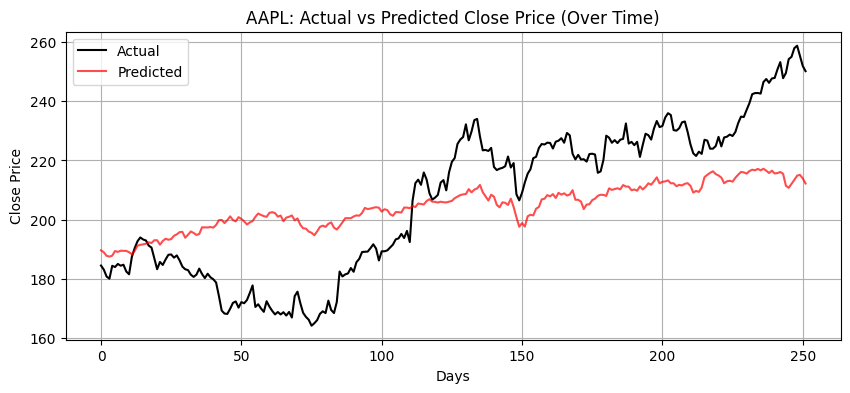

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(1):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

So epoch 1 isnt that bad but i have a diverging model problem. Try lower lr, common culprit for diverging models.

Epoch 01 | Train Loss: 0.0004 | Test Loss: 0.0057
Epoch 02 | Train Loss: 0.0010 | Test Loss: 0.0059
Epoch 03 | Train Loss: 0.0010 | Test Loss: 0.0061
Epoch 04 | Train Loss: 0.0010 | Test Loss: 0.0062
Epoch 05 | Train Loss: 0.0009 | Test Loss: 0.0063
Epoch 06 | Train Loss: 0.0009 | Test Loss: 0.0064
Epoch 07 | Train Loss: 0.0008 | Test Loss: 0.0066
Epoch 08 | Train Loss: 0.0008 | Test Loss: 0.0067
Epoch 09 | Train Loss: 0.0008 | Test Loss: 0.0068
Epoch 10 | Train Loss: 0.0007 | Test Loss: 0.0069
Epoch 11 | Train Loss: 0.0007 | Test Loss: 0.0070
Epoch 12 | Train Loss: 0.0007 | Test Loss: 0.0071
Epoch 13 | Train Loss: 0.0007 | Test Loss: 0.0072
Epoch 14 | Train Loss: 0.0007 | Test Loss: 0.0072
Epoch 15 | Train Loss: 0.0007 | Test Loss: 0.0073
Epoch 16 | Train Loss: 0.0007 | Test Loss: 0.0074
Epoch 17 | Train Loss: 0.0007 | Test Loss: 0.0075
Epoch 18 | Train Loss: 0.0007 | Test Loss: 0.0075
Epoch 19 | Train Loss: 0.0007 | Test Loss: 0.0076
Epoch 20 | Train Loss: 0.0006 | Test Loss: 0.0076


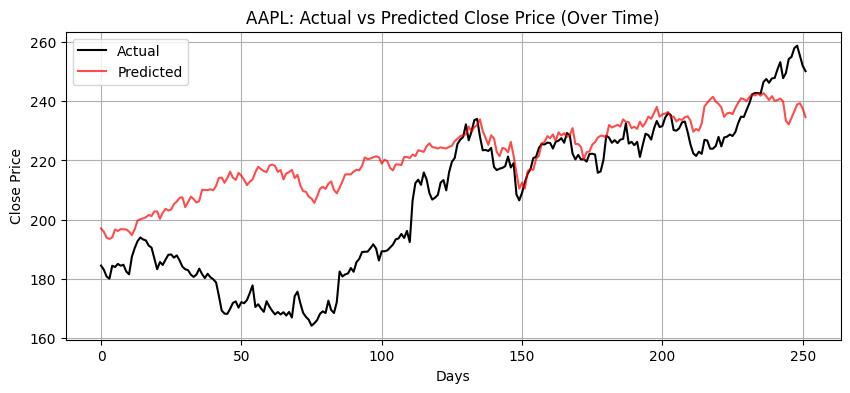

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

Lower LR didnt fix it but much better.  Try lower lr and simpler model.

Epoch 01 | Train Loss: 0.0005 | Test Loss: 0.0065
Epoch 02 | Train Loss: 0.0030 | Test Loss: 0.0065
Epoch 03 | Train Loss: 0.0032 | Test Loss: 0.0065
Epoch 04 | Train Loss: 0.0029 | Test Loss: 0.0067
Epoch 05 | Train Loss: 0.0026 | Test Loss: 0.0069
Epoch 06 | Train Loss: 0.0022 | Test Loss: 0.0073
Epoch 07 | Train Loss: 0.0018 | Test Loss: 0.0076
Epoch 08 | Train Loss: 0.0015 | Test Loss: 0.0080
Epoch 09 | Train Loss: 0.0013 | Test Loss: 0.0083
Epoch 10 | Train Loss: 0.0011 | Test Loss: 0.0086
Epoch 11 | Train Loss: 0.0010 | Test Loss: 0.0089
Epoch 12 | Train Loss: 0.0009 | Test Loss: 0.0091
Epoch 13 | Train Loss: 0.0008 | Test Loss: 0.0094
Epoch 14 | Train Loss: 0.0008 | Test Loss: 0.0096
Epoch 15 | Train Loss: 0.0008 | Test Loss: 0.0098
Epoch 16 | Train Loss: 0.0007 | Test Loss: 0.0099
Epoch 17 | Train Loss: 0.0007 | Test Loss: 0.0101
Epoch 18 | Train Loss: 0.0007 | Test Loss: 0.0102
Epoch 19 | Train Loss: 0.0007 | Test Loss: 0.0103
Epoch 20 | Train Loss: 0.0007 | Test Loss: 0.0104


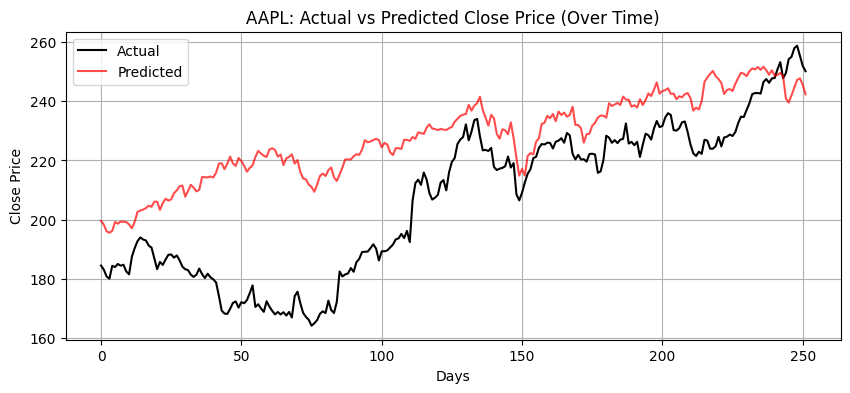

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = F.elu(self.gat2(x, edge_index))
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

I think lowering lr just slows down convergence, wont fix it. Maybe this is a sensible prediction but aapl fell behind market in early 2024? Try another period.

Epoch 01 | Train Loss: 0.0200 | Test Loss: 0.0055
Epoch 02 | Train Loss: 0.0103 | Test Loss: 0.0081
Epoch 03 | Train Loss: 0.0101 | Test Loss: 0.0058
Epoch 04 | Train Loss: 0.0084 | Test Loss: 0.0056
Epoch 05 | Train Loss: 0.0083 | Test Loss: 0.0088
Epoch 06 | Train Loss: 0.0078 | Test Loss: 0.0055
Epoch 07 | Train Loss: 0.0072 | Test Loss: 0.0059
Epoch 08 | Train Loss: 0.0066 | Test Loss: 0.0056
Epoch 09 | Train Loss: 0.0055 | Test Loss: 0.0079
Epoch 10 | Train Loss: 0.0056 | Test Loss: 0.0075
Epoch 11 | Train Loss: 0.0056 | Test Loss: 0.0080
Epoch 12 | Train Loss: 0.0053 | Test Loss: 0.0077
Epoch 13 | Train Loss: 0.0050 | Test Loss: 0.0070
Epoch 14 | Train Loss: 0.0048 | Test Loss: 0.0082
Epoch 15 | Train Loss: 0.0047 | Test Loss: 0.0076
Epoch 16 | Train Loss: 0.0041 | Test Loss: 0.0107
Epoch 17 | Train Loss: 0.0043 | Test Loss: 0.0142
Epoch 18 | Train Loss: 0.0039 | Test Loss: 0.0134
Epoch 19 | Train Loss: 0.0036 | Test Loss: 0.0109
Epoch 20 | Train Loss: 0.0035 | Test Loss: 0.0137


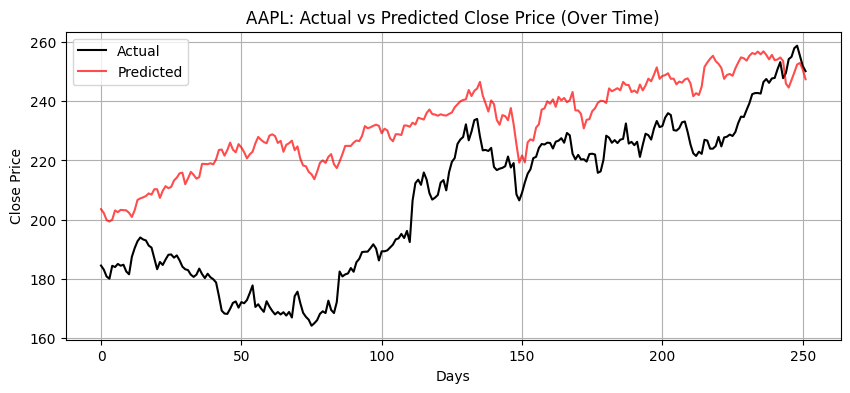

Epoch 01 | Train Loss: 0.0050 | Test Loss: 0.0064
Epoch 02 | Train Loss: 0.0033 | Test Loss: 0.0072
Epoch 03 | Train Loss: 0.0023 | Test Loss: 0.0095
Epoch 04 | Train Loss: 0.0020 | Test Loss: 0.0090
Epoch 05 | Train Loss: 0.0024 | Test Loss: 0.0129
Epoch 06 | Train Loss: 0.0038 | Test Loss: 0.0091
Epoch 07 | Train Loss: 0.0027 | Test Loss: 0.0126
Epoch 08 | Train Loss: 0.0039 | Test Loss: 0.0104
Epoch 09 | Train Loss: 0.0028 | Test Loss: 0.0137
Epoch 10 | Train Loss: 0.0037 | Test Loss: 0.0085
Epoch 11 | Train Loss: 0.0026 | Test Loss: 0.0152
Epoch 12 | Train Loss: 0.0038 | Test Loss: 0.0078
Epoch 13 | Train Loss: 0.0030 | Test Loss: 0.0149
Epoch 14 | Train Loss: 0.0039 | Test Loss: 0.0098
Epoch 15 | Train Loss: 0.0026 | Test Loss: 0.0133
Epoch 16 | Train Loss: 0.0040 | Test Loss: 0.0087
Epoch 17 | Train Loss: 0.0027 | Test Loss: 0.0177
Epoch 18 | Train Loss: 0.0034 | Test Loss: 0.0083
Epoch 19 | Train Loss: 0.0026 | Test Loss: 0.0173
Epoch 20 | Train Loss: 0.0038 | Test Loss: 0.0086


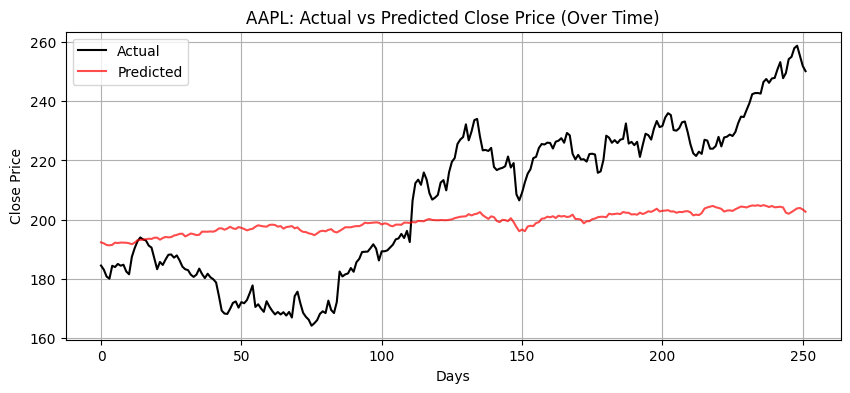

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.2):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

dropout works well for train loss; decreasing consistently but test loss doesnt improve. This likely means overfitting so increase dropout again.

Epoch 01 | Train Loss: 0.0521 | Test Loss: 0.0114
Epoch 02 | Train Loss: 0.0292 | Test Loss: 0.0075
Epoch 03 | Train Loss: 0.0266 | Test Loss: 0.0053
Epoch 04 | Train Loss: 0.0249 | Test Loss: 0.0074
Epoch 05 | Train Loss: 0.0208 | Test Loss: 0.0053
Epoch 06 | Train Loss: 0.0198 | Test Loss: 0.0050
Epoch 07 | Train Loss: 0.0185 | Test Loss: 0.0058
Epoch 08 | Train Loss: 0.0164 | Test Loss: 0.0052
Epoch 09 | Train Loss: 0.0140 | Test Loss: 0.0048
Epoch 10 | Train Loss: 0.0129 | Test Loss: 0.0046
Epoch 11 | Train Loss: 0.0125 | Test Loss: 0.0048
Epoch 12 | Train Loss: 0.0116 | Test Loss: 0.0044
Epoch 13 | Train Loss: 0.0099 | Test Loss: 0.0051
Epoch 14 | Train Loss: 0.0090 | Test Loss: 0.0055
Epoch 15 | Train Loss: 0.0075 | Test Loss: 0.0056
Epoch 16 | Train Loss: 0.0070 | Test Loss: 0.0048
Epoch 17 | Train Loss: 0.0061 | Test Loss: 0.0044
Epoch 18 | Train Loss: 0.0055 | Test Loss: 0.0082
Epoch 19 | Train Loss: 0.0058 | Test Loss: 0.0055
Epoch 20 | Train Loss: 0.0047 | Test Loss: 0.0075


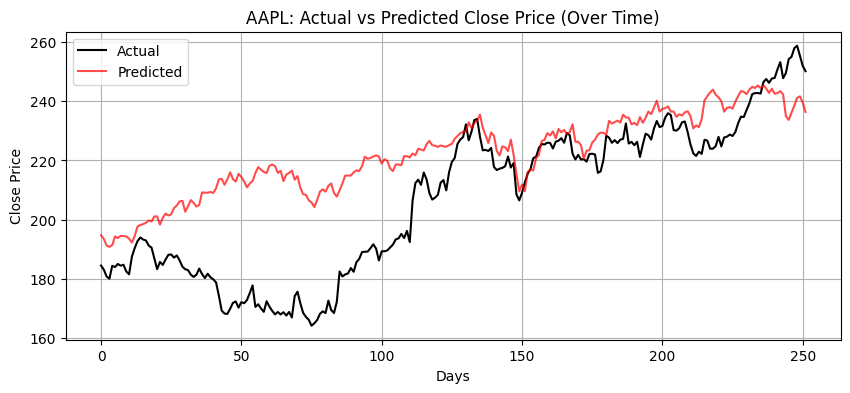

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

The predictions here do not incorporate previous days' data. Lets change that so that there is a lookback window of 20 days.

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]

    scaler = MinMaxScaler()
    df['Close'] = scaler.fit_transform(df[['Close']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close']].values.flatten()
            x.append(features_window)

        for target in target_stocks:
            y.append(panel[target].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_aapl_21day.pt')

Epoch 01 | Train Loss: 0.0361 | Test Loss: 0.0072
Epoch 02 | Train Loss: 0.0248 | Test Loss: 0.0057
Epoch 03 | Train Loss: 0.0224 | Test Loss: 0.0071
Epoch 04 | Train Loss: 0.0217 | Test Loss: 0.0070
Epoch 05 | Train Loss: 0.0197 | Test Loss: 0.0053
Epoch 06 | Train Loss: 0.0175 | Test Loss: 0.0065
Epoch 07 | Train Loss: 0.0159 | Test Loss: 0.0050
Epoch 08 | Train Loss: 0.0137 | Test Loss: 0.0051
Epoch 09 | Train Loss: 0.0132 | Test Loss: 0.0048
Epoch 10 | Train Loss: 0.0114 | Test Loss: 0.0049
Epoch 11 | Train Loss: 0.0103 | Test Loss: 0.0046
Epoch 12 | Train Loss: 0.0091 | Test Loss: 0.0069
Epoch 13 | Train Loss: 0.0085 | Test Loss: 0.0050
Epoch 14 | Train Loss: 0.0076 | Test Loss: 0.0052
Epoch 15 | Train Loss: 0.0066 | Test Loss: 0.0045
Epoch 16 | Train Loss: 0.0063 | Test Loss: 0.0057
Epoch 17 | Train Loss: 0.0056 | Test Loss: 0.0074
Epoch 18 | Train Loss: 0.0052 | Test Loss: 0.0050
Epoch 19 | Train Loss: 0.0049 | Test Loss: 0.0077
Epoch 20 | Train Loss: 0.0043 | Test Loss: 0.0062


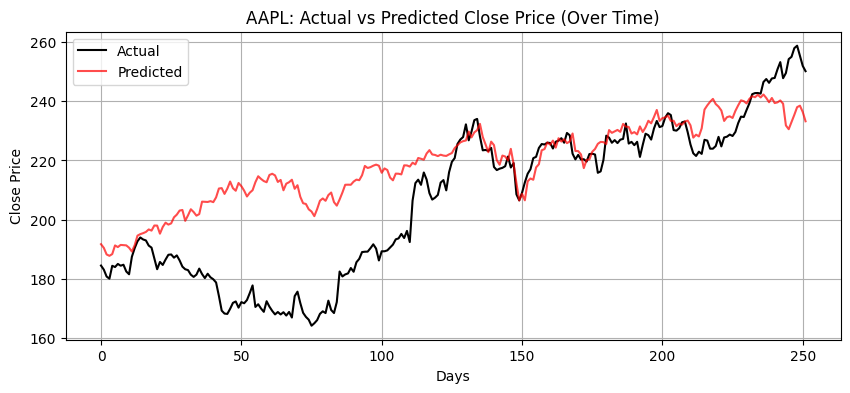

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

Epoch 01 | Train Loss: 0.0235 | Test Loss: 0.0085
Epoch 02 | Train Loss: 0.0209 | Test Loss: 0.0083
Epoch 03 | Train Loss: 0.0175 | Test Loss: 0.0110
Epoch 04 | Train Loss: 0.0169 | Test Loss: 0.0060
Epoch 05 | Train Loss: 0.0142 | Test Loss: 0.0076
Epoch 06 | Train Loss: 0.0122 | Test Loss: 0.0054
Epoch 07 | Train Loss: 0.0126 | Test Loss: 0.0052
Epoch 08 | Train Loss: 0.0111 | Test Loss: 0.0050
Epoch 09 | Train Loss: 0.0095 | Test Loss: 0.0048
Epoch 10 | Train Loss: 0.0086 | Test Loss: 0.0047
Epoch 11 | Train Loss: 0.0073 | Test Loss: 0.0049
Epoch 12 | Train Loss: 0.0068 | Test Loss: 0.0061
Epoch 13 | Train Loss: 0.0068 | Test Loss: 0.0064
Epoch 14 | Train Loss: 0.0061 | Test Loss: 0.0066
Epoch 15 | Train Loss: 0.0053 | Test Loss: 0.0061
Epoch 16 | Train Loss: 0.0049 | Test Loss: 0.0066
Epoch 17 | Train Loss: 0.0046 | Test Loss: 0.0074
Epoch 18 | Train Loss: 0.0044 | Test Loss: 0.0056
Epoch 19 | Train Loss: 0.0039 | Test Loss: 0.0053
Epoch 20 | Train Loss: 0.0037 | Test Loss: 0.0097


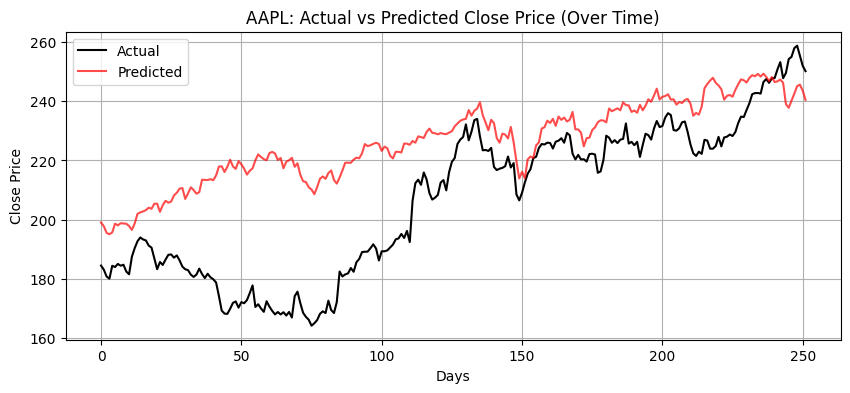

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(x, edge_index, return_attention_weights=True) # Capture attention weights
        x = F.elu(x)
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor) # Return output and the tuple with edge_index and attention_weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


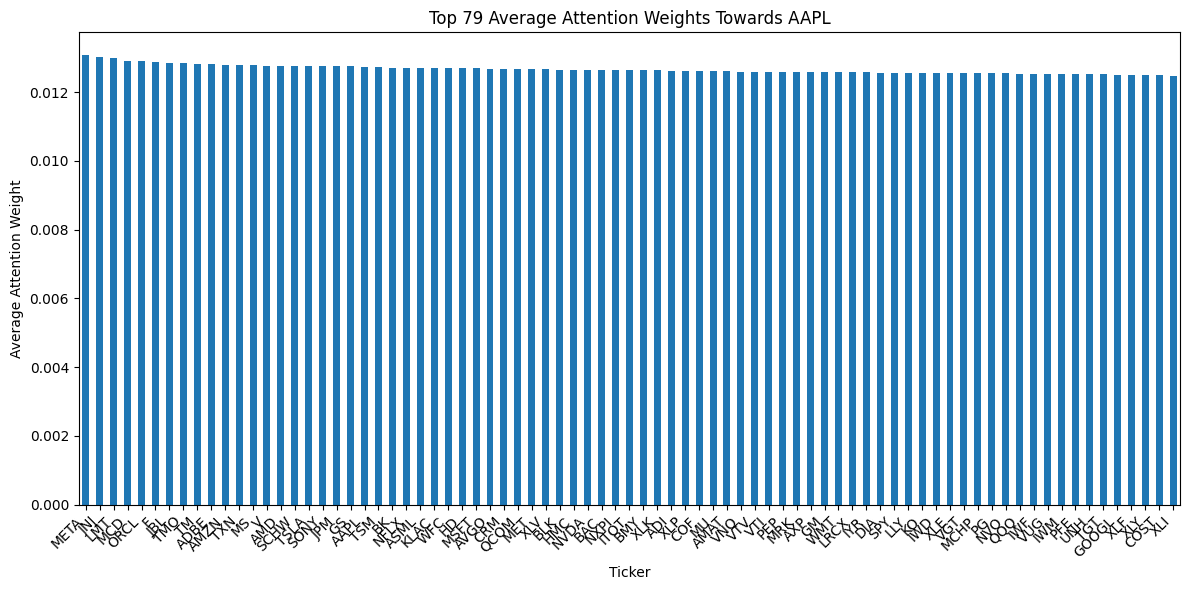

Top 79 tickers by average attention weight towards AAPL:
META     0.013082
JNJ      0.013030
LMT      0.012978
MCD      0.012896
ORCL     0.012894
           ...   
GOOGL    0.012506
XLF      0.012500
XLY      0.012496
COST     0.012491
XLI      0.012477
Length: 79, dtype: float32


In [ ]:
# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    tickers_in_panel = list(panel.keys()) # Assuming 'panel' is available from previous cells

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel)

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 79
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

All values are extremely similar; suggests that the model's attention mechanism isn't effectively learning distinct relationships between AAPL and other nodes based on the current input.

incorporating more informative features might help.

maybe graph shouldnt be fully connected.

maybe more complex model and epochs needed to learn relationships

maybe a smaller graph focusing on sector related stocks and etfs would help.

In [ ]:
import os
import shutil

source_path = "/content/graph_list.pt"
destination_dir = "/content/drive/MyDrive/GNN_Graphs"
destination_path = os.path.join(destination_dir, os.path.basename(source_path))

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the file
try:
    shutil.copy(source_path, destination_path)
    print(f"File saved successfully to {destination_path}")
except FileNotFoundError:
    print(f"Error: Source file not found at {source_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File saved successfully to /content/drive/MyDrive/GNN_Graphs/graph_list.pt


In [ ]:
import os
import shutil

source_path = "/content/scaler_aapl.save"
destination_dir = "/content/drive/MyDrive/GNN_Graphs"
destination_path = os.path.join(destination_dir, os.path.basename(source_path))

shutil.copy(source_path, destination_path)

'/content/drive/MyDrive/GNN_Graphs/scaler_aapl.save'

# ---

In [ ]:
pip install torch-geometric ta

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler_close

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers_to_process:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close']].values.flatten()
            x.append(features_window)

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers_to_process))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_aapl_21day_rsimacd.pt')

Epoch 01 | Train Loss: 0.0174 | Test Loss: 0.0057
Epoch 02 | Train Loss: 0.0125 | Test Loss: 0.0081
Epoch 03 | Train Loss: 0.0113 | Test Loss: 0.0059
Epoch 04 | Train Loss: 0.0097 | Test Loss: 0.0065
Epoch 05 | Train Loss: 0.0095 | Test Loss: 0.0058
Epoch 06 | Train Loss: 0.0093 | Test Loss: 0.0059
Epoch 07 | Train Loss: 0.0086 | Test Loss: 0.0060
Epoch 08 | Train Loss: 0.0083 | Test Loss: 0.0069
Epoch 09 | Train Loss: 0.0081 | Test Loss: 0.0060
Epoch 10 | Train Loss: 0.0072 | Test Loss: 0.0062
Epoch 11 | Train Loss: 0.0067 | Test Loss: 0.0059
Epoch 12 | Train Loss: 0.0066 | Test Loss: 0.0066
Epoch 13 | Train Loss: 0.0062 | Test Loss: 0.0066
Epoch 14 | Train Loss: 0.0061 | Test Loss: 0.0058
Epoch 15 | Train Loss: 0.0058 | Test Loss: 0.0059
Epoch 16 | Train Loss: 0.0060 | Test Loss: 0.0060
Epoch 17 | Train Loss: 0.0058 | Test Loss: 0.0063
Epoch 18 | Train Loss: 0.0055 | Test Loss: 0.0058
Epoch 19 | Train Loss: 0.0052 | Test Loss: 0.0058
Epoch 20 | Train Loss: 0.0046 | Test Loss: 0.0069


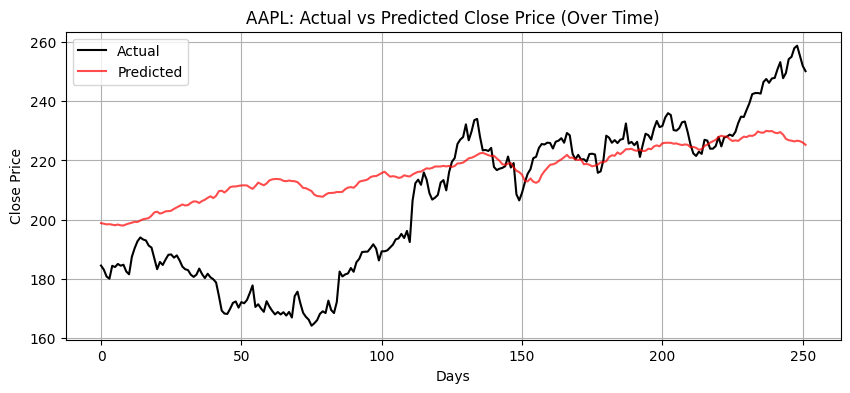

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


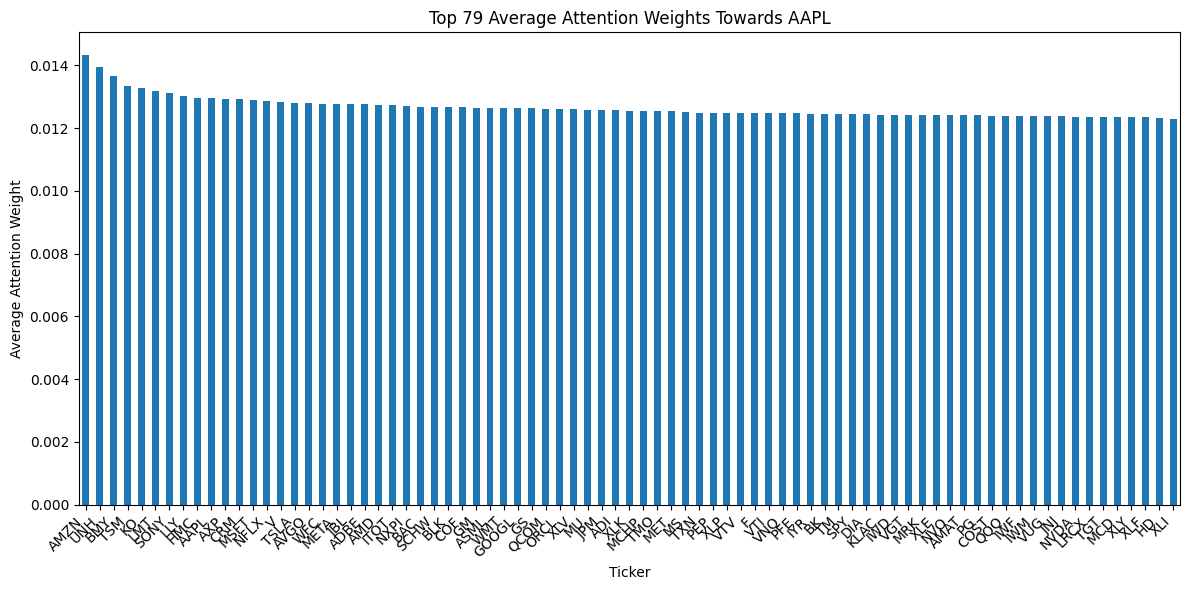

Top 79 tickers by average attention weight towards AAPL:
AMZN    0.014338
UNH     0.013953
BMY     0.013654
TSM     0.013344
KO      0.013281
          ...   
MCD     0.012347
XLY     0.012344
XLF     0.012341
HD      0.012338
XLI     0.012307
Length: 79, dtype: float32


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(x, edge_index, return_attention_weights=True) # Capture attention weights
        x = F.elu(x)
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor) # Return output and the tuple with edge_index and attention_weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=21, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")




# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    tickers_in_panel = list(panel.keys()) # Assuming 'panel' is available from previous cells

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel)

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 79
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler_close

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers_to_process:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close', 'RSI', 'MACD']].values.flatten()
            x.append(features_window)

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers_to_process))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_aapl_21day_rsimacd.pt')

Epoch 01 | Train Loss: 0.0520 | Test Loss: 0.0691
Epoch 02 | Train Loss: 0.0199 | Test Loss: 0.0213
Epoch 03 | Train Loss: 0.0169 | Test Loss: 0.0181
Epoch 04 | Train Loss: 0.0129 | Test Loss: 0.0161
Epoch 05 | Train Loss: 0.0112 | Test Loss: 0.0143
Epoch 06 | Train Loss: 0.0096 | Test Loss: 0.0103
Epoch 07 | Train Loss: 0.0088 | Test Loss: 0.0096
Epoch 08 | Train Loss: 0.0086 | Test Loss: 0.0144
Epoch 09 | Train Loss: 0.0081 | Test Loss: 0.0145
Epoch 10 | Train Loss: 0.0076 | Test Loss: 0.0090
Epoch 11 | Train Loss: 0.0071 | Test Loss: 0.0146
Epoch 12 | Train Loss: 0.0064 | Test Loss: 0.0142
Epoch 13 | Train Loss: 0.0064 | Test Loss: 0.0122
Epoch 14 | Train Loss: 0.0066 | Test Loss: 0.0126
Epoch 15 | Train Loss: 0.0060 | Test Loss: 0.0124
Epoch 16 | Train Loss: 0.0061 | Test Loss: 0.0148
Epoch 17 | Train Loss: 0.0057 | Test Loss: 0.0163
Epoch 18 | Train Loss: 0.0058 | Test Loss: 0.0106
Epoch 19 | Train Loss: 0.0061 | Test Loss: 0.0113
Epoch 20 | Train Loss: 0.0064 | Test Loss: 0.0107


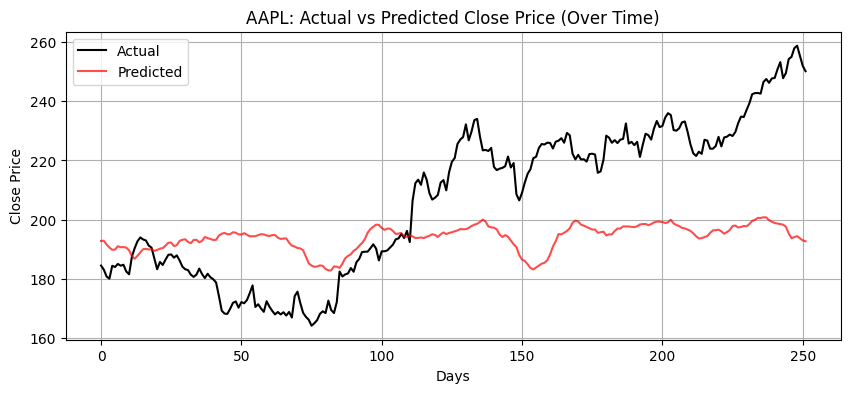

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


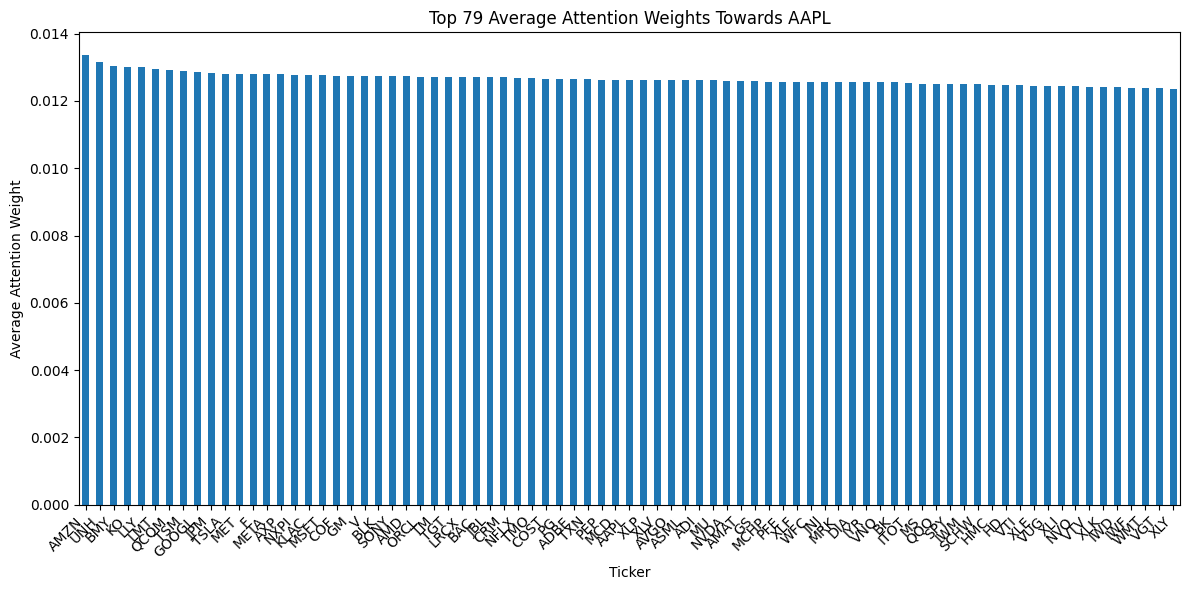

Top 79 tickers by average attention weight towards AAPL:
AMZN    0.013372
UNH     0.013150
BMY     0.013028
KO      0.013018
LLY     0.013008
          ...   
IWD     0.012403
IWF     0.012388
WMT     0.012387
VGT     0.012374
XLY     0.012360
Length: 79, dtype: float32


In [ ]:

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(x, edge_index, return_attention_weights=True) # Capture attention weights
        x = F.elu(x)
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor) # Return output and the tuple with edge_index and attention_weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")




# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    tickers_in_panel = list(panel.keys()) # Assuming 'panel' is available from previous cells

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel)

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 79
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

Epoch 01 | Train Loss: 0.0041 | Test Loss: 0.0153
Epoch 02 | Train Loss: 0.0028 | Test Loss: 0.0070
Epoch 03 | Train Loss: 0.0030 | Test Loss: 0.0072
Epoch 04 | Train Loss: 0.0026 | Test Loss: 0.0066
Epoch 05 | Train Loss: 0.0023 | Test Loss: 0.0056
Epoch 06 | Train Loss: 0.0024 | Test Loss: 0.0055
Epoch 07 | Train Loss: 0.0023 | Test Loss: 0.0054
Epoch 08 | Train Loss: 0.0022 | Test Loss: 0.0066
Epoch 09 | Train Loss: 0.0022 | Test Loss: 0.0065
Epoch 10 | Train Loss: 0.0022 | Test Loss: 0.0096
Epoch 11 | Train Loss: 0.0021 | Test Loss: 0.0058
Epoch 12 | Train Loss: 0.0021 | Test Loss: 0.0057
Epoch 13 | Train Loss: 0.0021 | Test Loss: 0.0062
Epoch 14 | Train Loss: 0.0021 | Test Loss: 0.0059
Epoch 15 | Train Loss: 0.0022 | Test Loss: 0.0064
Epoch 16 | Train Loss: 0.0021 | Test Loss: 0.0072
Epoch 17 | Train Loss: 0.0022 | Test Loss: 0.0061
Epoch 18 | Train Loss: 0.0022 | Test Loss: 0.0065
Epoch 19 | Train Loss: 0.0022 | Test Loss: 0.0061
Epoch 20 | Train Loss: 0.0021 | Test Loss: 0.0076


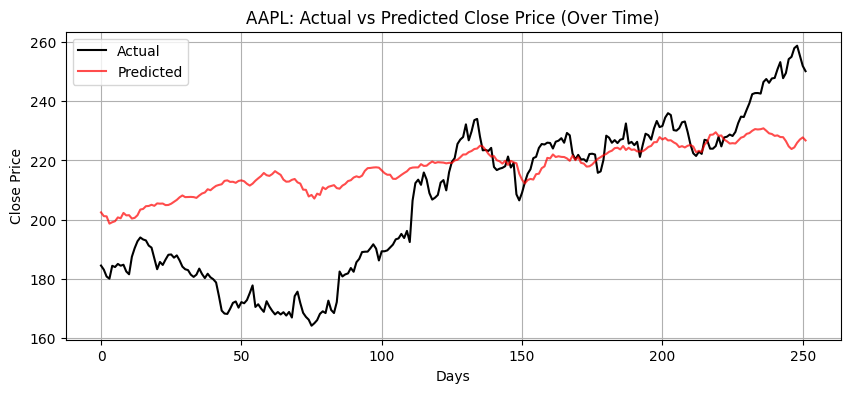

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


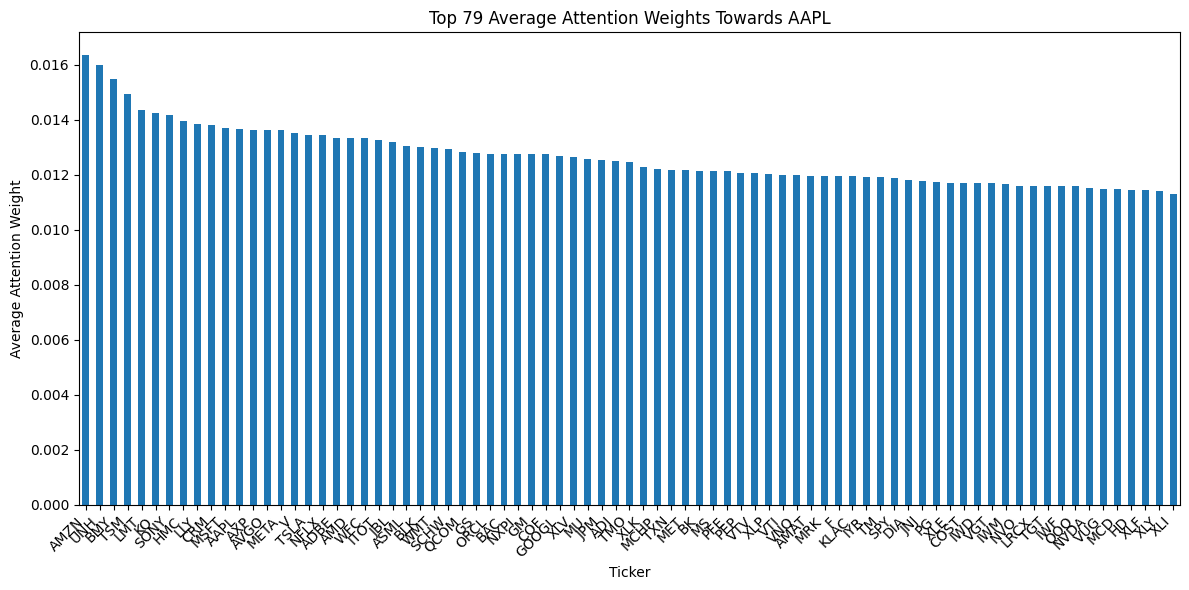

Top 79 tickers by average attention weight towards AAPL:
AMZN    0.016366
UNH     0.015999
BMY     0.015482
TSM     0.014927
LMT     0.014357
          ...   
MCD     0.011491
HD      0.011456
XLF     0.011432
XLY     0.011427
XLI     0.011294
Length: 79, dtype: float32


In [ ]:

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(x, edge_index, return_attention_weights=True) # Capture attention weights
        x = F.elu(x)
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor) # Return output and the tuple with edge_index and attention_weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")




# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    tickers_in_panel = list(panel.keys()) # Assuming 'panel' is available from previous cells

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel)

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 79
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

Epoch 01 | Train Loss: 0.0060 | Test Loss: 0.0123
Epoch 02 | Train Loss: 0.0034 | Test Loss: 0.0074
Epoch 03 | Train Loss: 0.0020 | Test Loss: 0.0068
Epoch 04 | Train Loss: 0.0016 | Test Loss: 0.0067
Epoch 05 | Train Loss: 0.0012 | Test Loss: 0.0066
Epoch 06 | Train Loss: 0.0012 | Test Loss: 0.0060
Epoch 07 | Train Loss: 0.0011 | Test Loss: 0.0061
Epoch 08 | Train Loss: 0.0012 | Test Loss: 0.0060
Epoch 09 | Train Loss: 0.0011 | Test Loss: 0.0060
Epoch 10 | Train Loss: 0.0011 | Test Loss: 0.0059
Epoch 11 | Train Loss: 0.0011 | Test Loss: 0.0060
Epoch 12 | Train Loss: 0.0011 | Test Loss: 0.0059
Epoch 13 | Train Loss: 0.0011 | Test Loss: 0.0060
Epoch 14 | Train Loss: 0.0011 | Test Loss: 0.0069
Epoch 15 | Train Loss: 0.0012 | Test Loss: 0.0063
Epoch 16 | Train Loss: 0.0010 | Test Loss: 0.0066
Epoch 17 | Train Loss: 0.0011 | Test Loss: 0.0066
Epoch 18 | Train Loss: 0.0012 | Test Loss: 0.0064
Epoch 19 | Train Loss: 0.0012 | Test Loss: 0.0063
Epoch 20 | Train Loss: 0.0011 | Test Loss: 0.0066


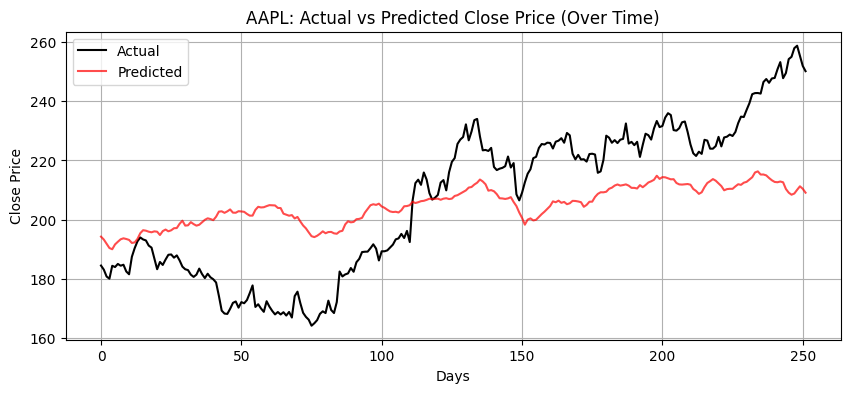

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


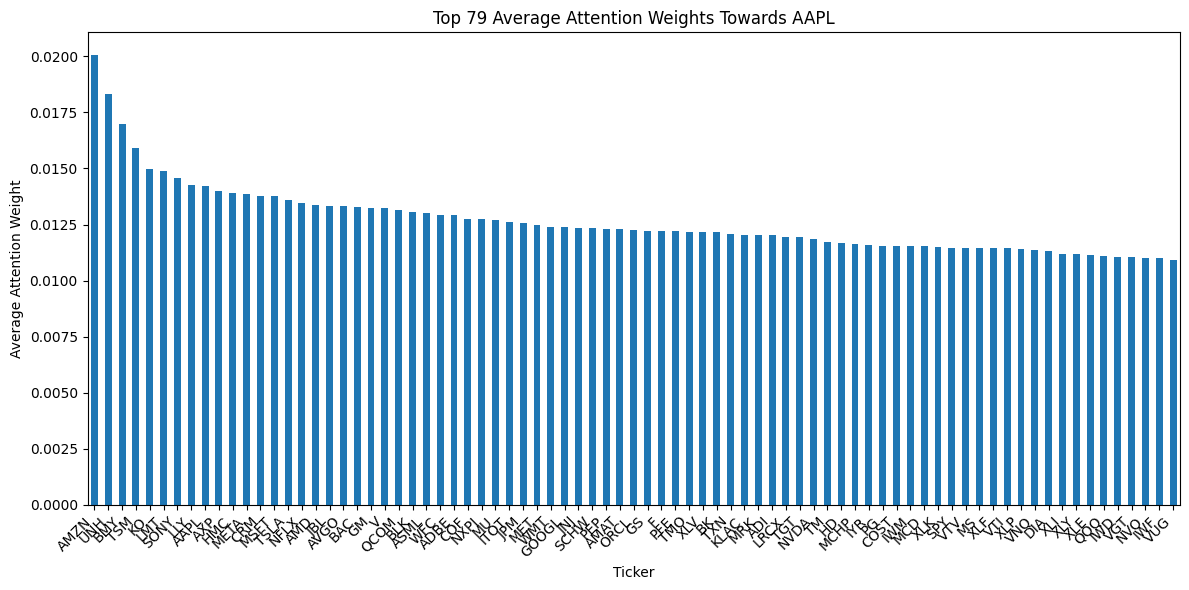

Top 79 tickers by average attention weight towards AAPL:
AMZN    0.020070
UNH     0.018307
BMY     0.016995
TSM     0.015921
KO      0.014957
          ...   
IWD     0.011043
VGT     0.011032
NVO     0.011003
IWF     0.011000
VUG     0.010937
Length: 79, dtype: float32


In [ ]:

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")




# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    tickers_in_panel = list(panel.keys()) # Assuming 'panel' is available from previous cells

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel)

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 79
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler_close

selected_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META',
                   'SONY', 'JBL', 'PYPL', 'NFLX', 'QCOM', 'TSM', 'AVGO', 'TXN',
                   'MU'] #14
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'XLK', 'VGT'] # 4.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers_to_process:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close', 'RSI', 'MACD']].values.flatten()
            x.append(features_window)

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers_to_process))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_aapl_21day_rsimacd_lim.pt')

Epoch 01 | Train Loss: 0.0050 | Test Loss: 0.0155
Epoch 02 | Train Loss: 0.0026 | Test Loss: 0.0074
Epoch 03 | Train Loss: 0.0017 | Test Loss: 0.0050
Epoch 04 | Train Loss: 0.0012 | Test Loss: 0.0045
Epoch 05 | Train Loss: 0.0010 | Test Loss: 0.0040
Epoch 06 | Train Loss: 0.0010 | Test Loss: 0.0049
Epoch 07 | Train Loss: 0.0008 | Test Loss: 0.0062
Epoch 08 | Train Loss: 0.0008 | Test Loss: 0.0067
Epoch 09 | Train Loss: 0.0008 | Test Loss: 0.0063
Epoch 10 | Train Loss: 0.0008 | Test Loss: 0.0095
Epoch 11 | Train Loss: 0.0008 | Test Loss: 0.0047
Epoch 12 | Train Loss: 0.0007 | Test Loss: 0.0059
Epoch 13 | Train Loss: 0.0008 | Test Loss: 0.0087
Epoch 14 | Train Loss: 0.0008 | Test Loss: 0.0073
Epoch 15 | Train Loss: 0.0007 | Test Loss: 0.0082
Epoch 16 | Train Loss: 0.0008 | Test Loss: 0.0083
Epoch 17 | Train Loss: 0.0007 | Test Loss: 0.0105
Epoch 18 | Train Loss: 0.0008 | Test Loss: 0.0090
Epoch 19 | Train Loss: 0.0007 | Test Loss: 0.0114
Epoch 20 | Train Loss: 0.0008 | Test Loss: 0.0108


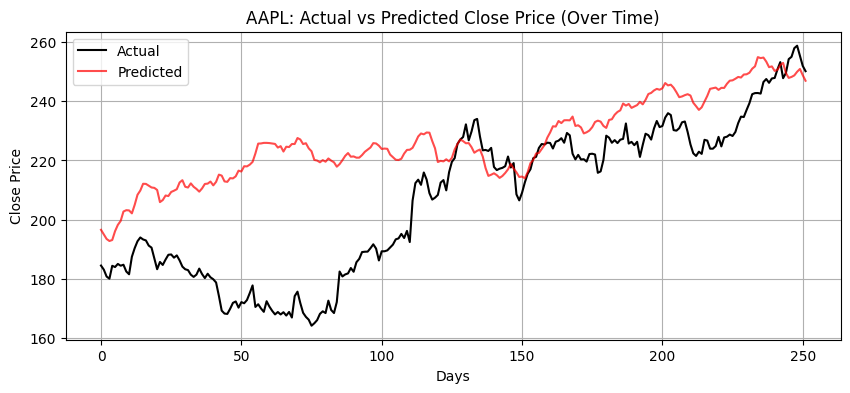

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([18, 4])


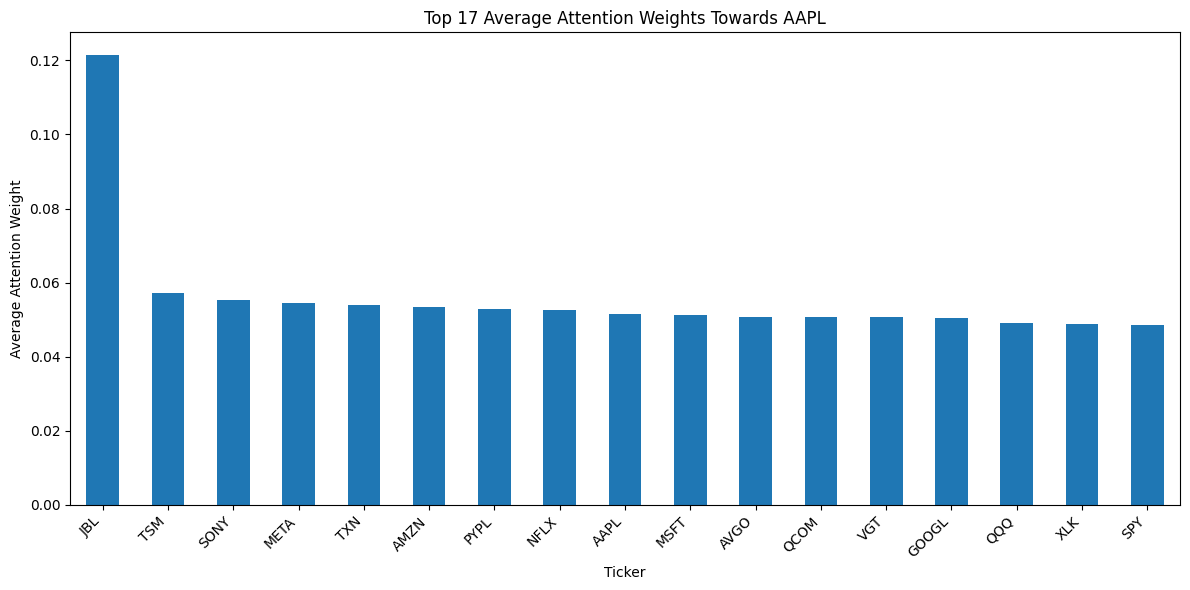

Top 17 tickers by average attention weight towards AAPL:
JBL      0.121506
TSM      0.057109
SONY     0.055251
META     0.054371
TXN      0.053951
AMZN     0.053382
PYPL     0.052907
NFLX     0.052558
AAPL     0.051429
MSFT     0.051206
AVGO     0.050708
QCOM     0.050688
VGT      0.050666
GOOGL    0.050490
QQQ      0.049102
XLK      0.048908
SPY      0.048487
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd_lim.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

In [ ]:
tickers_in_panel

['AAPL',
 'GOOGL',
 'MSFT',
 'AMZN',
 'META',
 'SONY',
 'JBL',
 'PYPL',
 'NFLX',
 'QCOM',
 'TSM',
 'AVGO',
 'TXN',
 'MU',
 'SPY',
 'QQQ',
 'XLK',
 'VGT']

Maybe stocks are just alll bad. Lets try SPY.

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler_close

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'SPY'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(etf_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers_to_process:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close', 'RSI', 'MACD']].values.flatten()
            x.append(features_window)

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers_to_process))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_spy_21day_rsimacd.pt')

Epoch 01 | Train Loss: 0.0065 | Test Loss: 0.0264
Epoch 02 | Train Loss: 0.0034 | Test Loss: 0.0054
Epoch 03 | Train Loss: 0.0015 | Test Loss: 0.0034
Epoch 04 | Train Loss: 0.0011 | Test Loss: 0.0013
Epoch 05 | Train Loss: 0.0009 | Test Loss: 0.0006
Epoch 06 | Train Loss: 0.0008 | Test Loss: 0.0008
Epoch 07 | Train Loss: 0.0008 | Test Loss: 0.0011
Epoch 08 | Train Loss: 0.0007 | Test Loss: 0.0004
Epoch 09 | Train Loss: 0.0007 | Test Loss: 0.0009
Epoch 10 | Train Loss: 0.0007 | Test Loss: 0.0005
Epoch 11 | Train Loss: 0.0006 | Test Loss: 0.0005
Epoch 12 | Train Loss: 0.0006 | Test Loss: 0.0007
Epoch 13 | Train Loss: 0.0006 | Test Loss: 0.0005
Epoch 14 | Train Loss: 0.0006 | Test Loss: 0.0006
Epoch 15 | Train Loss: 0.0006 | Test Loss: 0.0011
Epoch 16 | Train Loss: 0.0006 | Test Loss: 0.0007
Epoch 17 | Train Loss: 0.0005 | Test Loss: 0.0006
Epoch 18 | Train Loss: 0.0006 | Test Loss: 0.0004
Epoch 19 | Train Loss: 0.0005 | Test Loss: 0.0005
Epoch 20 | Train Loss: 0.0005 | Test Loss: 0.0005


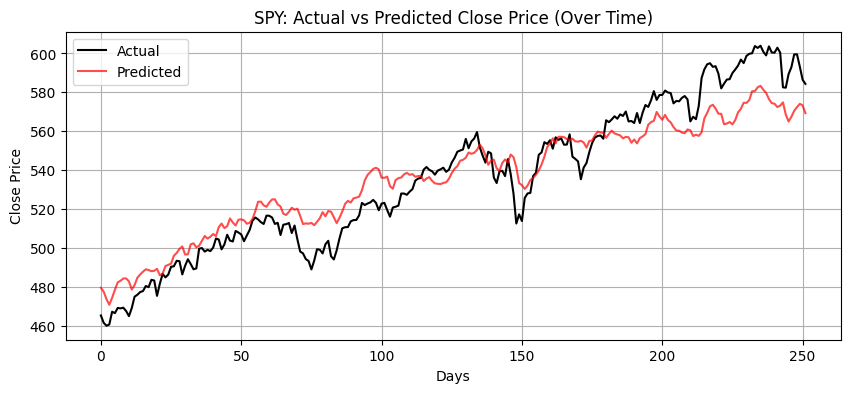

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


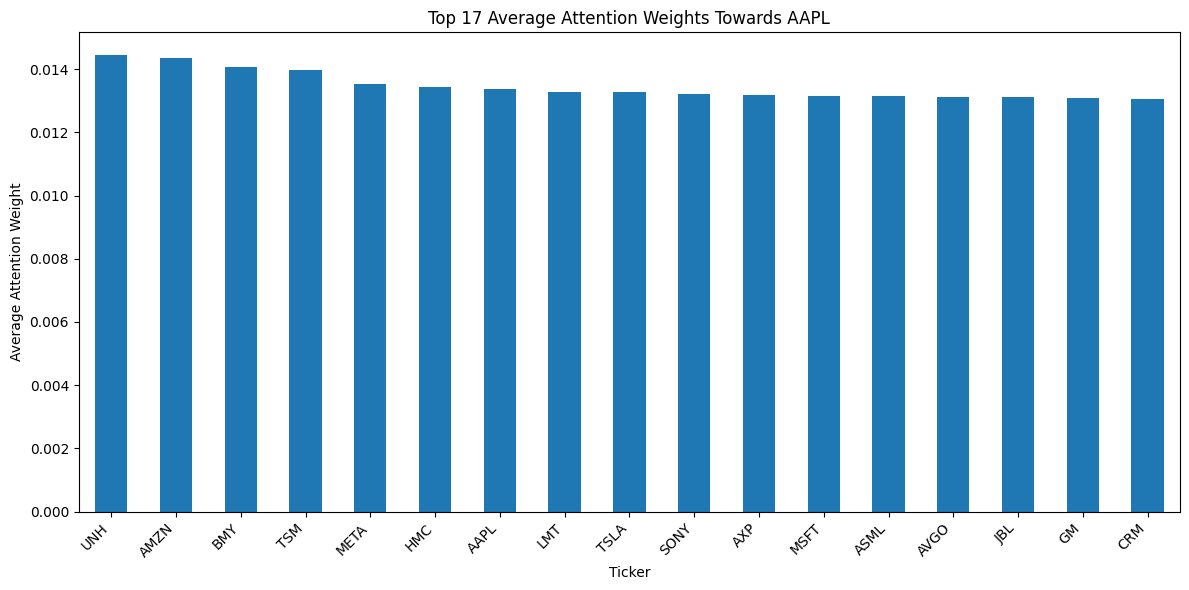

Top 17 tickers by average attention weight towards AAPL:
UNH     0.014445
AMZN    0.014341
BMY     0.014078
TSM     0.013977
META    0.013538
HMC     0.013424
AAPL    0.013360
LMT     0.013281
TSLA    0.013271
SONY    0.013229
AXP     0.013178
MSFT    0.013165
ASML    0.013141
AVGO    0.013118
JBL     0.013114
GM      0.013074
CRM     0.013069
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

Lower heads, higher lr, hidden channels up to 50.

Epoch 01 | Train Loss: 0.0042 | Test Loss: 0.0048
Epoch 02 | Train Loss: 0.0023 | Test Loss: 0.0024
Epoch 03 | Train Loss: 0.0013 | Test Loss: 0.0070
Epoch 04 | Train Loss: 0.0009 | Test Loss: 0.0023
Epoch 05 | Train Loss: 0.0008 | Test Loss: 0.0023
Epoch 06 | Train Loss: 0.0007 | Test Loss: 0.0027
Epoch 07 | Train Loss: 0.0005 | Test Loss: 0.0024
Epoch 08 | Train Loss: 0.0007 | Test Loss: 0.0029
Epoch 09 | Train Loss: 0.0008 | Test Loss: 0.0053
Epoch 10 | Train Loss: 0.0008 | Test Loss: 0.0117
Epoch 11 | Train Loss: 0.0009 | Test Loss: 0.0120
Epoch 12 | Train Loss: 0.0007 | Test Loss: 0.0271
Epoch 13 | Train Loss: 0.0007 | Test Loss: 0.0183
Epoch 14 | Train Loss: 0.0007 | Test Loss: 0.0041
Epoch 15 | Train Loss: 0.0009 | Test Loss: 0.0085
Epoch 16 | Train Loss: 0.0009 | Test Loss: 0.0041
Epoch 17 | Train Loss: 0.0008 | Test Loss: 0.0098
Epoch 18 | Train Loss: 0.0009 | Test Loss: 0.0050
Epoch 19 | Train Loss: 0.0007 | Test Loss: 0.0106
Epoch 20 | Train Loss: 0.0007 | Test Loss: 0.0063


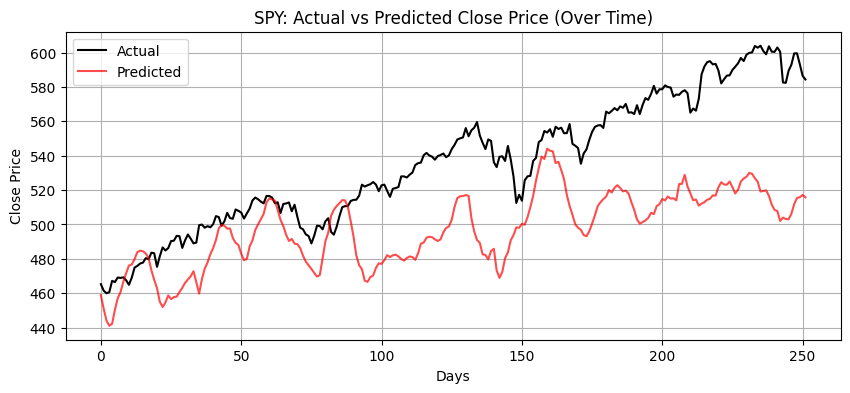

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 2])


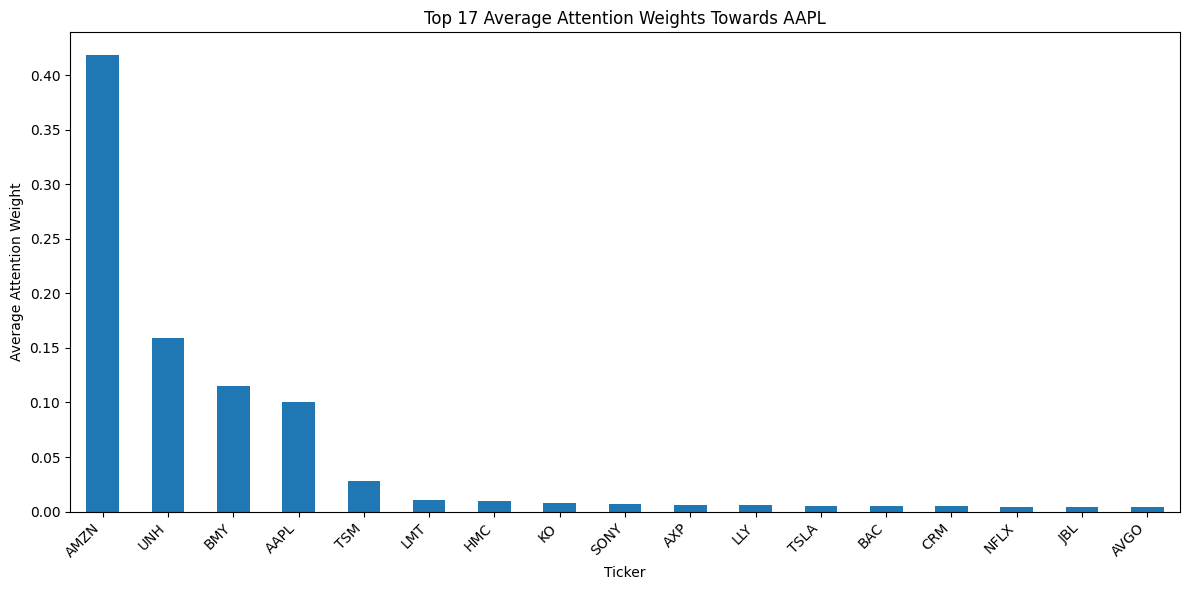

Top 17 tickers by average attention weight towards AAPL:
AMZN    0.418361
UNH     0.159156
BMY     0.115129
AAPL    0.100889
TSM     0.028368
LMT     0.010942
HMC     0.009275
KO      0.008195
SONY    0.006605
AXP     0.005846
LLY     0.005659
TSLA    0.005019
BAC     0.004885
CRM     0.004774
NFLX    0.004205
JBL     0.004130
AVGO    0.003883
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=2, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=50, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

way worse. higher heads.

Epoch 01 | Train Loss: 0.0042 | Test Loss: 0.0061
Epoch 02 | Train Loss: 0.0022 | Test Loss: 0.0017
Epoch 03 | Train Loss: 0.0012 | Test Loss: 0.0017
Epoch 04 | Train Loss: 0.0007 | Test Loss: 0.0007
Epoch 05 | Train Loss: 0.0007 | Test Loss: 0.0006
Epoch 06 | Train Loss: 0.0005 | Test Loss: 0.0004
Epoch 07 | Train Loss: 0.0005 | Test Loss: 0.0004
Epoch 08 | Train Loss: 0.0004 | Test Loss: 0.0012
Epoch 09 | Train Loss: 0.0005 | Test Loss: 0.0005
Epoch 10 | Train Loss: 0.0004 | Test Loss: 0.0007
Epoch 11 | Train Loss: 0.0005 | Test Loss: 0.0005
Epoch 12 | Train Loss: 0.0004 | Test Loss: 0.0029
Epoch 13 | Train Loss: 0.0005 | Test Loss: 0.0010
Epoch 14 | Train Loss: 0.0004 | Test Loss: 0.0005
Epoch 15 | Train Loss: 0.0004 | Test Loss: 0.0007
Epoch 16 | Train Loss: 0.0004 | Test Loss: 0.0005
Epoch 17 | Train Loss: 0.0004 | Test Loss: 0.0007
Epoch 18 | Train Loss: 0.0004 | Test Loss: 0.0006
Epoch 19 | Train Loss: 0.0004 | Test Loss: 0.0008
Epoch 20 | Train Loss: 0.0004 | Test Loss: 0.0006


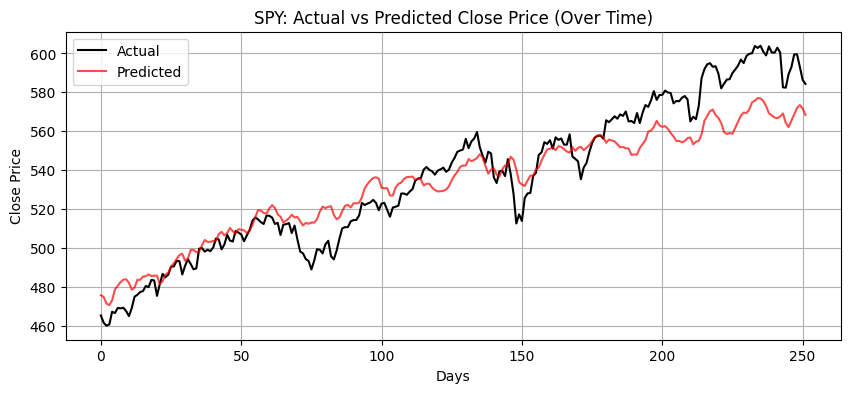

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 8])


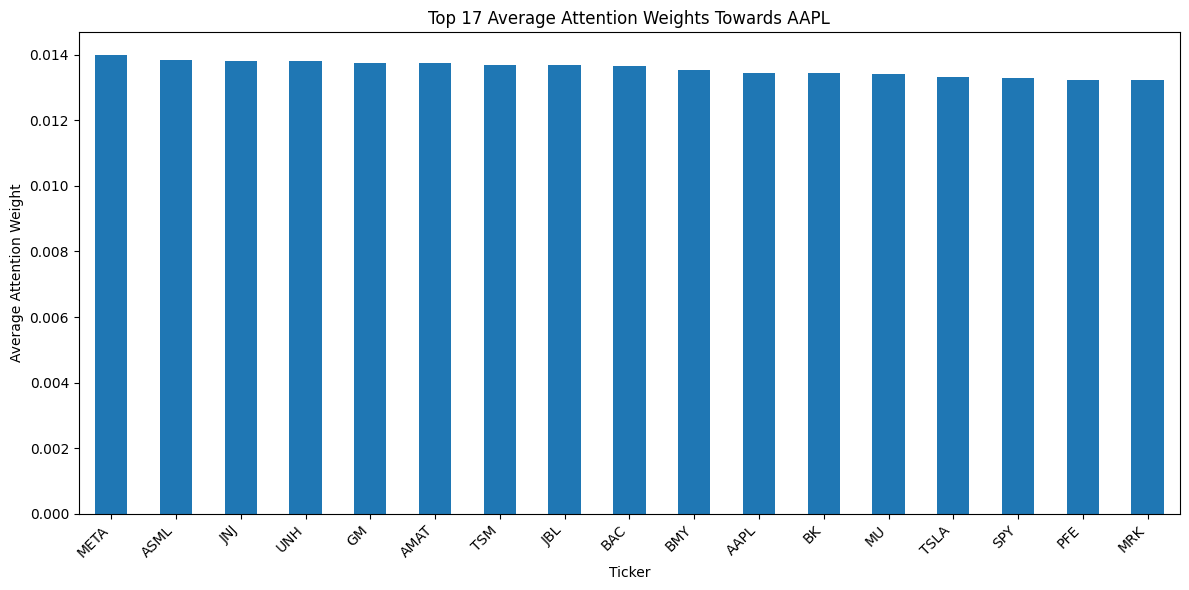

Top 17 tickers by average attention weight towards AAPL:
META    0.013985
ASML    0.013833
JNJ     0.013815
UNH     0.013808
GM      0.013760
AMAT    0.013740
TSM     0.013697
JBL     0.013676
BAC     0.013647
BMY     0.013522
AAPL    0.013451
BK      0.013440
MU      0.013415
TSLA    0.013314
SPY     0.013289
PFE     0.013243
MRK     0.013236
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()
    df['ma_5'] = df['Close'].rolling(window=5).mean()
    df['volatility_63'] = df['Close'].rolling(window=63).std()
    df['intraday_range'] = df['High'] - df['Low']
    df['upper_shadow'] = df['High'] - df[['Open', 'Close']].max(axis=1)
    df['lower_shadow'] = df[['Open', 'Close']].min(axis=1) - df['Low']
    df['momentum_126'] = df['Close'] - df['Close'].shift(126)

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['Volume'] = scaler.fit_transform(df[['Volume']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])
    df['ma_5'] = scaler.fit_transform(df[['ma_5']])
    df['volatility_63'] = scaler.fit_transform(df[['volatility_63']])
    df['intraday_range'] = scaler.fit_transform(df[['intraday_range']])
    df['upper_shadow'] = scaler.fit_transform(df[['upper_shadow']])
    df['lower_shadow'] = scaler.fit_transform(df[['lower_shadow']])
    df['momentum_126'] = scaler.fit_transform(df[['momentum_126']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    df = df.drop(columns=['Open', 'High', 'Low'])
    return df.dropna(), scaler_close

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'SPY'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(etf_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    window_size = 21  # today + previous 20 days

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(window_size - 1, num_days):
        x = []
        y = []

        for ticker in tickers_to_process:
            # Collect features from day-(window_size-1) to day (inclusive)
            window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
            # Extract features for each day in window: Close, RSI, MACD
            # Shape: (window_size, 3)
            features_window = window_rows[['Close', 'RSI', 'MACD', 'Volume',
                                           'ma_5', 'volatility_63', 'intraday_range',
                                           'upper_shadow', 'lower_shadow', 'momentum_126']].values.flatten()
            x.append(features_window)

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day close as label

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

        edge_index = fully_connected_edges(len(tickers_to_process))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, 'graph_list_spy_21day_allfeat.pt')

Epoch 01 | Train Loss: 0.0045 | Test Loss: 0.0037
Epoch 02 | Train Loss: 0.0022 | Test Loss: 0.0050
Epoch 03 | Train Loss: 0.0024 | Test Loss: 0.0034
Epoch 04 | Train Loss: 0.0017 | Test Loss: 0.0028
Epoch 05 | Train Loss: 0.0010 | Test Loss: 0.0035
Epoch 06 | Train Loss: 0.0009 | Test Loss: 0.0040
Epoch 07 | Train Loss: 0.0008 | Test Loss: 0.0012
Epoch 08 | Train Loss: 0.0009 | Test Loss: 0.0015
Epoch 09 | Train Loss: 0.0007 | Test Loss: 0.0024
Epoch 10 | Train Loss: 0.0007 | Test Loss: 0.0017
Epoch 11 | Train Loss: 0.0007 | Test Loss: 0.0023
Epoch 12 | Train Loss: 0.0007 | Test Loss: 0.0016
Epoch 13 | Train Loss: 0.0006 | Test Loss: 0.0038
Epoch 14 | Train Loss: 0.0006 | Test Loss: 0.0042
Epoch 15 | Train Loss: 0.0006 | Test Loss: 0.0034
Epoch 16 | Train Loss: 0.0005 | Test Loss: 0.0035
Epoch 17 | Train Loss: 0.0005 | Test Loss: 0.0035
Epoch 18 | Train Loss: 0.0004 | Test Loss: 0.0030
Epoch 19 | Train Loss: 0.0005 | Test Loss: 0.0054
Epoch 20 | Train Loss: 0.0005 | Test Loss: 0.0065


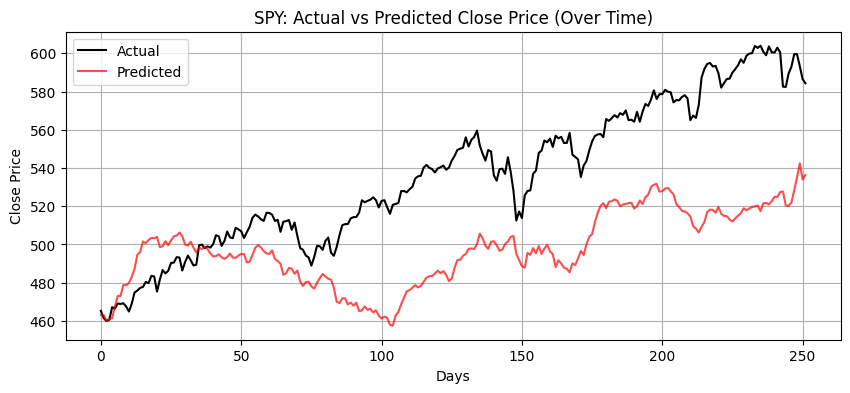

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


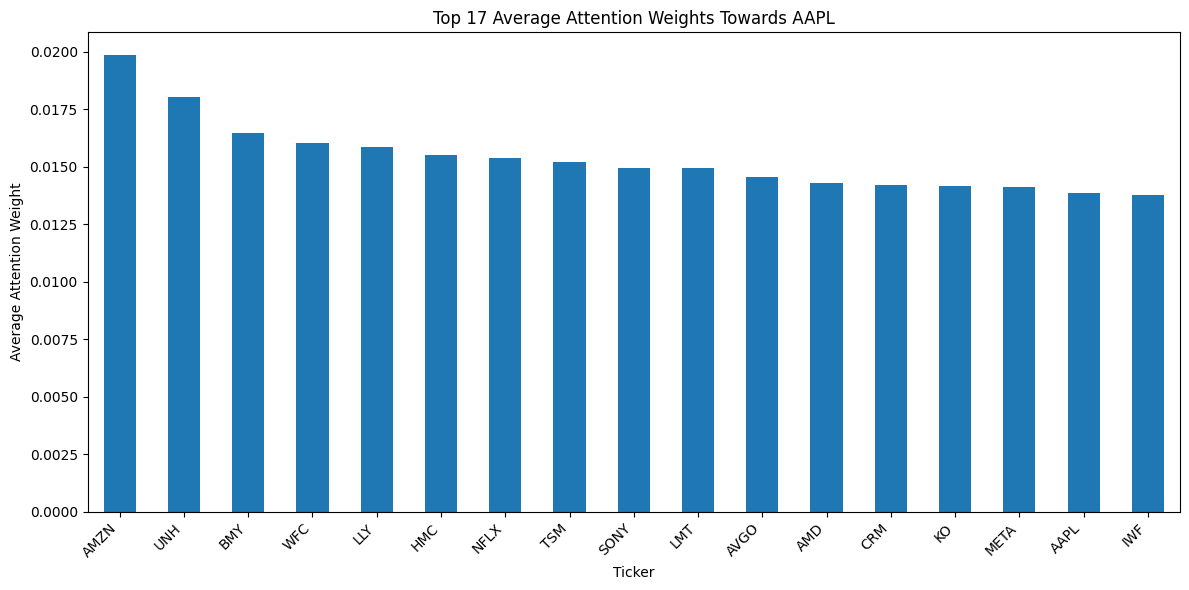

Top 17 tickers by average attention weight towards AAPL:
AMZN    0.019853
UNH     0.018039
BMY     0.016478
WFC     0.016014
LLY     0.015856
HMC     0.015512
NFLX    0.015395
TSM     0.015184
SONY    0.014950
LMT     0.014933
AVGO    0.014542
AMD     0.014280
CRM     0.014214
KO      0.014178
META    0.014110
AAPL    0.013877
IWF     0.013780
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_allfeat.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=210, hidden_channels=32, out_channels=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

All features didnt help.

New model structure:

Epoch 01 | Train Loss: 0.0227 | Test Loss: 0.0077
Epoch 02 | Train Loss: 0.0056 | Test Loss: 0.0027
Epoch 03 | Train Loss: 0.0036 | Test Loss: 0.0086
Epoch 04 | Train Loss: 0.0024 | Test Loss: 0.0050
Epoch 05 | Train Loss: 0.0032 | Test Loss: 0.0158
Epoch 06 | Train Loss: 0.0014 | Test Loss: 0.0055
Epoch 07 | Train Loss: 0.0020 | Test Loss: 0.0054
Epoch 08 | Train Loss: 0.0014 | Test Loss: 0.0090
Epoch 09 | Train Loss: 0.0010 | Test Loss: 0.0030
Epoch 10 | Train Loss: 0.0009 | Test Loss: 0.0039
Epoch 11 | Train Loss: 0.0009 | Test Loss: 0.0018
Epoch 12 | Train Loss: 0.0009 | Test Loss: 0.0035
Epoch 13 | Train Loss: 0.0008 | Test Loss: 0.0055
Epoch 14 | Train Loss: 0.0010 | Test Loss: 0.0099
Epoch 15 | Train Loss: 0.0008 | Test Loss: 0.0107
Epoch 16 | Train Loss: 0.0007 | Test Loss: 0.0083
Epoch 17 | Train Loss: 0.0006 | Test Loss: 0.0081
Epoch 18 | Train Loss: 0.0007 | Test Loss: 0.0099
Epoch 19 | Train Loss: 0.0006 | Test Loss: 0.0072
Epoch 20 | Train Loss: 0.0006 | Test Loss: 0.0056


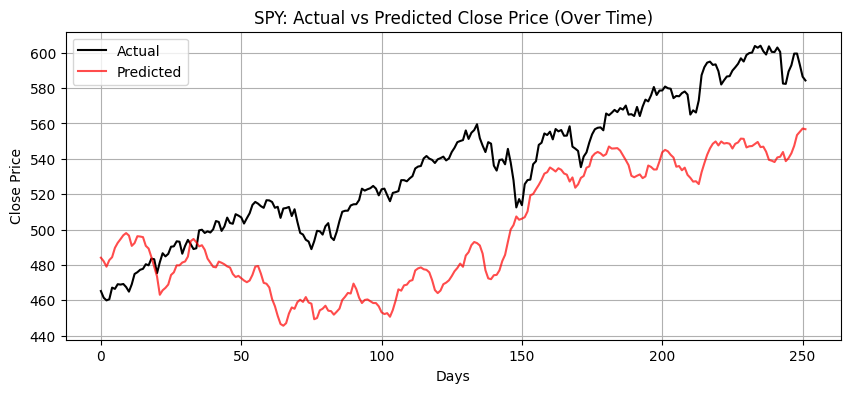

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 8])


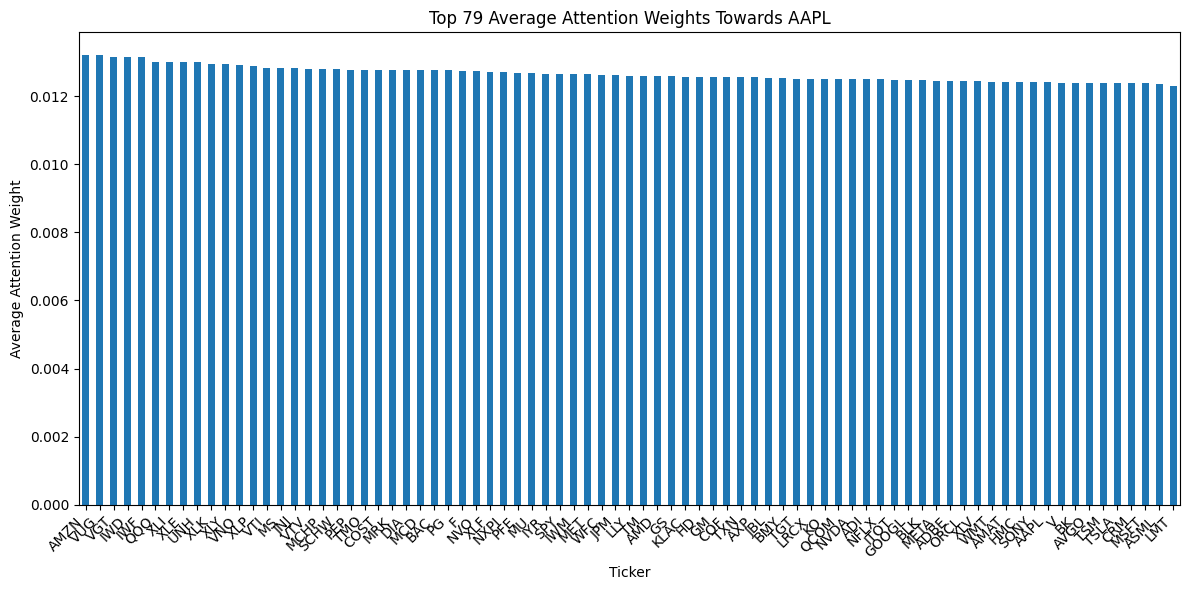

Top 79 tickers by average attention weight towards AAPL:
AMZN    0.013216
VUG     0.013209
VGT     0.013164
IWD     0.013159
IWF     0.013143
          ...   
TSLA    0.012384
CRM     0.012379
MSFT    0.012378
ASML    0.012347
LMT     0.012311
Length: 79, dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.nn.norm import LayerNorm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===

class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout_prob=0.2):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout_prob)
        self.norm1 = LayerNorm(hidden_channels * heads)
        self.res_proj1 = nn.Linear(in_channels, hidden_channels * heads)  # match dims

        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1, dropout=dropout_prob)
        self.norm2 = LayerNorm(hidden_channels)
        self.res_proj2 = nn.Linear(hidden_channels * heads, hidden_channels)  # match dims

        self.fc = nn.Linear(hidden_channels, out_channels)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        residual = x
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(self.norm1(x))
        x = self.dropout(x)
        x = x + self.res_proj1(residual)  # project before adding

        residual = x
        x = self.gat2(x, edge_index)
        x = F.elu(self.norm2(x))
        x = self.dropout(x)
        x = x + self.res_proj2(residual)  # project before adding

        output = self.fc(x)
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            # Handle case where attention weights are None
            if attn_weights_tensor is not None:
                 all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_in_panel) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

Try not fully connected graph.

In [ ]:
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def knn_edges(x_tensor, k=5):
    """
    x_tensor: torch.Tensor [num_nodes, num_features]
    k: number of nearest neighbors
    """
    # Compute similarity matrix
    sim = cosine_similarity(x_tensor.numpy())

    # For each node, find top k neighbors (excluding itself)
    edges = []
    for i in range(sim.shape[0]):
        # argsort in descending order, skip self (index 0 after sort)
        neighbors = np.argsort(-sim[i])[1:k+1]
        for j in neighbors:
            edges.append([i, j])

    edge_index = torch.tensor(edges, dtype=torch.long).t()  # shape [2, num_edges]
    return edge_index
edge_index = knn_edges(x_tensor, k=10)


In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib
from ta.momentum import RSIIndicator
from ta.trend import MACD

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['MACD'] = MACD(df['Close']).macd()

    scaler_close = MinMaxScaler()
    scaler = MinMaxScaler()
    df['Close'] = scaler_close.fit_transform(df[['Close']])
    df['RSI'] = scaler.fit_transform(df[['RSI']])
    df['MACD'] = scaler.fit_transform(df[['MACD']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler_close

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'SPY'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(etf_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def knn_edges(features, k=5):
    """
    features: [num_nodes, num_features] tensor
    returns: edge_index [2, num_edges]
    """
    feats_np = features.numpy()
    sim_matrix = cosine_similarity(feats_np)  # [num_nodes, num_nodes]

    # For each node, get top-k most similar (excluding self)
    edges = []
    num_nodes = sim_matrix.shape[0]
    for i in range(num_nodes):
        # Get indices of top k+1 (including self at rank 0)
        top_k = np.argsort(sim_matrix[i])[::-1][1:k+1]
        for j in top_k:
            edges.append((i, j))

    # Make edges undirected
    edges = list(set(edges) | set([(j, i) for (i, j) in edges]))
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    return edge_index

window_size = 21  # today + previous 20 days
graph_list = []
num_days = len(common_dates) - 1

for day in range(window_size - 1, num_days):
    x = []
    y = []

    for ticker in tickers_to_process:
        window_rows = panel[ticker].iloc[day - (window_size - 1): day + 1]
        features_window = window_rows[['Close', 'RSI', 'MACD']].values.flatten()
        x.append(features_window)

    y.append(panel[target_stock].iloc[day + 1]['Close'])  # label = next day's close

    x_tensor = torch.tensor(x, dtype=torch.float)
    y_tensor = torch.tensor(y, dtype=torch.float)
    x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
    y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)

    edge_index = knn_edges(x_tensor, k=10)  # <<< change k here for sparser/denser graph
    target_tensor = torch.tensor(target_indices, dtype=torch.long)

    data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
    graph_list.append(data)

torch.save(graph_list, 'graph_list_spy_21day_rsimacd_knn.pt')


Epoch 01 | Train Loss: 0.0077 | Test Loss: 0.0064
Epoch 02 | Train Loss: 0.0038 | Test Loss: 0.0102
Epoch 03 | Train Loss: 0.0028 | Test Loss: 0.0124
Epoch 04 | Train Loss: 0.0021 | Test Loss: 0.0129
Epoch 05 | Train Loss: 0.0018 | Test Loss: 0.0126
Epoch 06 | Train Loss: 0.0016 | Test Loss: 0.0100
Epoch 07 | Train Loss: 0.0015 | Test Loss: 0.0142
Epoch 08 | Train Loss: 0.0014 | Test Loss: 0.0142
Epoch 09 | Train Loss: 0.0015 | Test Loss: 0.0137
Epoch 10 | Train Loss: 0.0013 | Test Loss: 0.0136
Epoch 11 | Train Loss: 0.0013 | Test Loss: 0.0172
Epoch 12 | Train Loss: 0.0013 | Test Loss: 0.0153
Epoch 13 | Train Loss: 0.0012 | Test Loss: 0.0119
Epoch 14 | Train Loss: 0.0011 | Test Loss: 0.0193
Epoch 15 | Train Loss: 0.0012 | Test Loss: 0.0173
Epoch 16 | Train Loss: 0.0011 | Test Loss: 0.0196
Epoch 17 | Train Loss: 0.0011 | Test Loss: 0.0161
Epoch 18 | Train Loss: 0.0011 | Test Loss: 0.0194
Epoch 19 | Train Loss: 0.0011 | Test Loss: 0.0168
Epoch 20 | Train Loss: 0.0010 | Test Loss: 0.0166


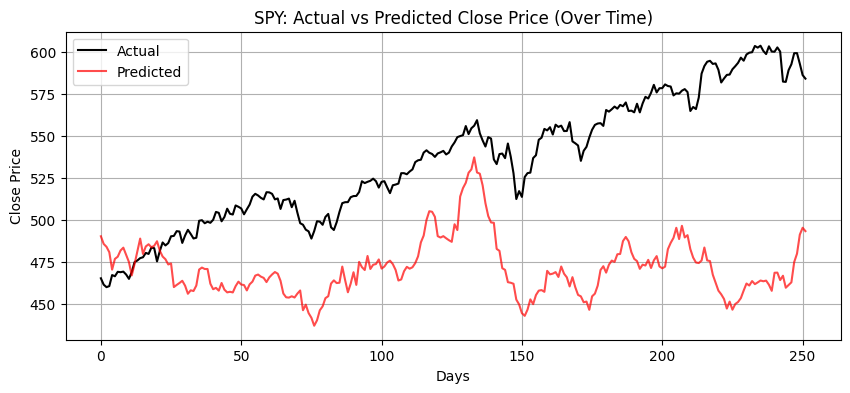

Extracted attention weights for SPY for 252 time steps.
Shape of attention weights for one time step: torch.Size([15, 4])


RuntimeError: shape '[252, 14, 4]' is invalid for input of size 14360

In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd_knn.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'SPY'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = 10 # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

bad. Below is the model that worked best for SPY: 1 layer, hidden channels 32, weights of all stocks extremely similar. The graph shows that the trends are captured but the price prediction isnt great. GNNs probably need a hybrid model.

Epoch 01 | Train Loss: 0.0055 | Test Loss: 0.0104
Epoch 02 | Train Loss: 0.0030 | Test Loss: 0.0072
Epoch 03 | Train Loss: 0.0018 | Test Loss: 0.0008
Epoch 04 | Train Loss: 0.0011 | Test Loss: 0.0032
Epoch 05 | Train Loss: 0.0009 | Test Loss: 0.0005
Epoch 06 | Train Loss: 0.0008 | Test Loss: 0.0004
Epoch 07 | Train Loss: 0.0008 | Test Loss: 0.0005
Epoch 08 | Train Loss: 0.0007 | Test Loss: 0.0006
Epoch 09 | Train Loss: 0.0007 | Test Loss: 0.0006
Epoch 10 | Train Loss: 0.0007 | Test Loss: 0.0008
Epoch 11 | Train Loss: 0.0007 | Test Loss: 0.0008
Epoch 12 | Train Loss: 0.0006 | Test Loss: 0.0004
Epoch 13 | Train Loss: 0.0007 | Test Loss: 0.0006
Epoch 14 | Train Loss: 0.0006 | Test Loss: 0.0008
Epoch 15 | Train Loss: 0.0006 | Test Loss: 0.0008
Epoch 16 | Train Loss: 0.0005 | Test Loss: 0.0006
Epoch 17 | Train Loss: 0.0005 | Test Loss: 0.0005
Epoch 18 | Train Loss: 0.0005 | Test Loss: 0.0007
Epoch 19 | Train Loss: 0.0006 | Test Loss: 0.0009
Epoch 20 | Train Loss: 0.0005 | Test Loss: 0.0005


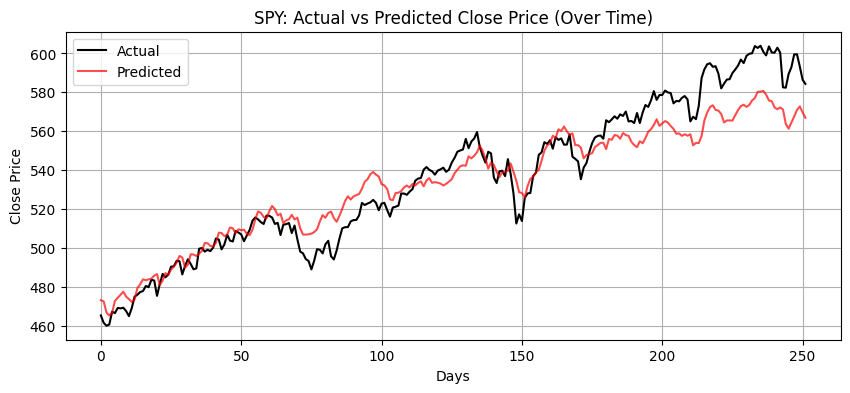

Extracted attention weights for SPY for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


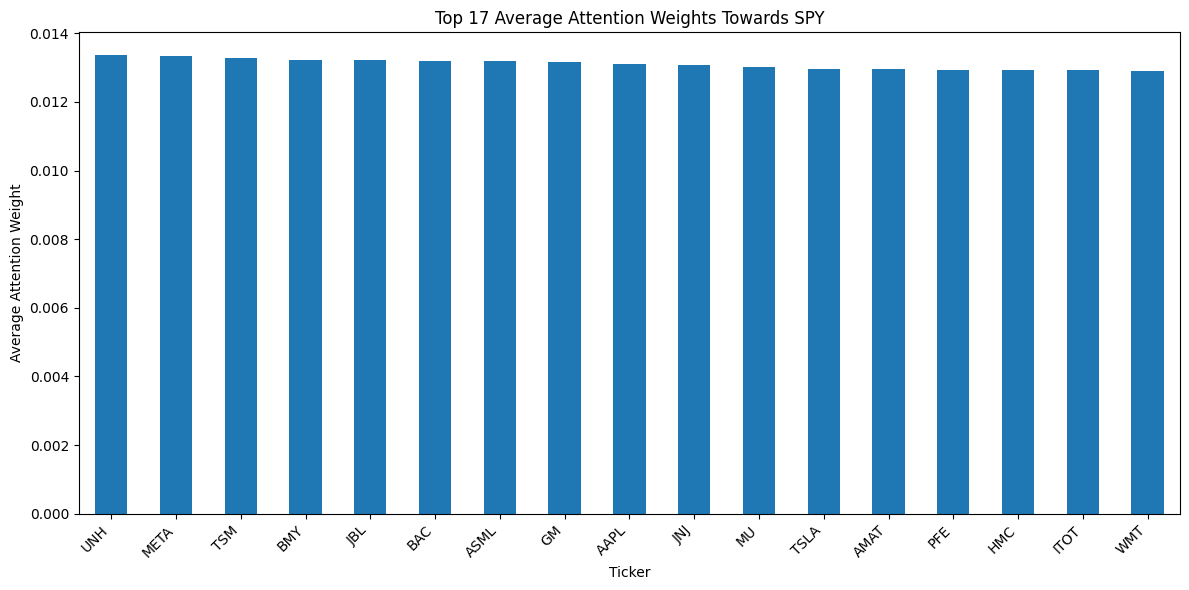

Top 17 tickers by average attention weight towards SPY:
UNH     0.013359
META    0.013339
TSM     0.013294
BMY     0.013219
JBL     0.013213
BAC     0.013185
ASML    0.013179
GM      0.013150
AAPL    0.013113
JNJ     0.013068
MU      0.013024
TSLA    0.012967
AMAT    0.012963
PFE     0.012939
HMC     0.012932
ITOT    0.012930
WMT     0.012892
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'SPY'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'SPY'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

Best AAPL model:

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from functools import reduce
import joblib

# Path to your stock and ETF folders
base_path = "/content/drive/MyDrive/CW_backup"
stock_path = os.path.join(base_path, "stocks")
etf_path = os.path.join(base_path, "etfs")

# Load and preprocess function (only scaled close price)
def load_and_scale_close(filepath):
    df = pd.read_csv(filepath, skiprows=3, header=None)
    df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df = df[['Date', 'Close']]

    scaler = MinMaxScaler()
    df['Close'] = scaler.fit_transform(df[['Close']])

    df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2024-12-31')]
    return df, scaler

selected_stocks = ['AAPL', 'JPM', 'NVDA', 'GOOGL', 'MSFT', 'AMZN', 'META', #7
                   'TSLA', 'SONY', 'JBL', 'NFLX',  'AMD', 'TSM', 'ORCL', 'AVGO',
                   'V', 'MS', 'COF', 'MET', 'AMAT', 'MCHP', 'ADI', #22
                   'BAC', 'BLK', "ASML", 'QCOM', 'CRM', 'ADBE', 'GS', 'WFC', #30
                   'SCHW', 'BK', 'AXP', 'TXN', 'MU', 'NXPI', 'KLAC', 'LRCX', #38
                   'UNH', 'JNJ', 'PFE', 'MRK', 'LLY', 'TMO', 'BMY', 'LMT', 'F',
                   'GM', 'HMC', 'TM', 'WMT', 'HD', 'COST', 'PG', 'KO', 'MCD',#56
                   'TGT', 'PEP', 'JNJ', 'NVO'] #60
# Related to the 4 i need + healthcare, automotive and consumer, for diversity.
selected_etfs = ['SPY', 'QQQ', 'DIA', 'IWM', 'XLK', 'XLF', 'XLE', 'XLI', 'XLV',
                 'XLY', 'XLP', 'VNQ', 'IYR', 'VGT', 'VTI', 'VUG', 'VTV', 'IWF',
                 'IWD', 'ITOT'] # 20.

target_stock = 'AAPL'

panel = {}

# Load and scale AAPL separately to save its scaler
aapl_filepath = os.path.join(stock_path, f"{target_stock}.csv")
aapl_df, aapl_scaler = load_and_scale_close(aapl_filepath)
panel[target_stock] = aapl_df
joblib.dump(aapl_scaler, f'scaler_{target_stock.lower()}.save')

# Load and scale other tickers
tickers_to_process = [t for t in selected_stocks + selected_etfs if t != target_stock]

for ticker in tickers_to_process:
    folder = stock_path if ticker in selected_stocks else etf_path
    filepath = os.path.join(folder, f"{ticker}.csv")
    if os.path.exists(filepath):
        try:
            df, _ = load_and_scale_close(filepath) # Scale each individually
            panel[ticker] = df
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    else:
        print(f"File for {ticker} not found")


# Select only common dates
dataframes_to_merge = [df[['Date']] for df in panel.values()]
if not dataframes_to_merge:
    print("No dataframes loaded to find common dates.")
else:
    common_dates = reduce(lambda x, y: pd.merge(x, y, on='Date', how='inner'), dataframes_to_merge)
    common_dates = pd.to_datetime(common_dates['Date'].unique())
    common_dates = sorted(common_dates.tolist()) # Corrected sorting


    # Filter dataframes by common dates
    for ticker in panel:
        panel[ticker] = panel[ticker][panel[ticker]['Date'].isin(common_dates)].reset_index(drop=True)

    # Create graph list
    tickers_in_panel = list(panel.keys())
    target_indices = [tickers_in_panel.index(target_stock)]

    def fully_connected_edges(num_nodes):
        row = torch.arange(num_nodes).repeat_interleave(num_nodes)
        col = torch.arange(num_nodes).repeat(num_nodes)
        return torch.stack([row, col], dim=0)

    graph_list = []
    num_days = len(common_dates) - 1  # Leave 1 for next-day label

    for day in range(num_days):
        x = []
        y = []

        for ticker in tickers_in_panel:
            row = panel[ticker].iloc[day]
            x.append([row['Close']]) # Only scaled close price as feature

        y.append(panel[target_stock].iloc[day + 1]['Close'])  # Next day's scaled close price

        x_tensor = torch.tensor(x, dtype=torch.float)
        y_tensor = torch.tensor(y, dtype=torch.float)
        x_tensor = torch.nan_to_num(x_tensor, nan=0.0, posinf=0.0, neginf=0.0)
        y_tensor = torch.nan_to_num(y_tensor, nan=0.0, posinf=0.0, neginf=0.0)


        edge_index = fully_connected_edges(len(tickers_in_panel))
        target_tensor = torch.tensor(target_indices, dtype=torch.long)

        data = Data(x=x_tensor, edge_index=edge_index, y=y_tensor, target_node_ids=target_tensor)
        graph_list.append(data)

    torch.save(graph_list, f'graph_list_{target_stock.lower()}_scaled_close.pt')

    print(f"Graph list saved for {target_stock} with scaled close prices.")

Graph list saved for AAPL with scaled close prices.


Epoch 01 | Train Loss: 0.0361 | Test Loss: 0.0072
Epoch 02 | Train Loss: 0.0248 | Test Loss: 0.0057
Epoch 03 | Train Loss: 0.0224 | Test Loss: 0.0071
Epoch 04 | Train Loss: 0.0217 | Test Loss: 0.0070
Epoch 05 | Train Loss: 0.0197 | Test Loss: 0.0053
Epoch 06 | Train Loss: 0.0175 | Test Loss: 0.0065
Epoch 07 | Train Loss: 0.0159 | Test Loss: 0.0050
Epoch 08 | Train Loss: 0.0137 | Test Loss: 0.0051
Epoch 09 | Train Loss: 0.0132 | Test Loss: 0.0048
Epoch 10 | Train Loss: 0.0114 | Test Loss: 0.0049
Epoch 11 | Train Loss: 0.0103 | Test Loss: 0.0046
Epoch 12 | Train Loss: 0.0091 | Test Loss: 0.0069
Epoch 13 | Train Loss: 0.0085 | Test Loss: 0.0050
Epoch 14 | Train Loss: 0.0076 | Test Loss: 0.0052
Epoch 15 | Train Loss: 0.0066 | Test Loss: 0.0045
Epoch 16 | Train Loss: 0.0063 | Test Loss: 0.0057
Epoch 17 | Train Loss: 0.0056 | Test Loss: 0.0074
Epoch 18 | Train Loss: 0.0052 | Test Loss: 0.0050
Epoch 19 | Train Loss: 0.0049 | Test Loss: 0.0077
Epoch 20 | Train Loss: 0.0043 | Test Loss: 0.0062


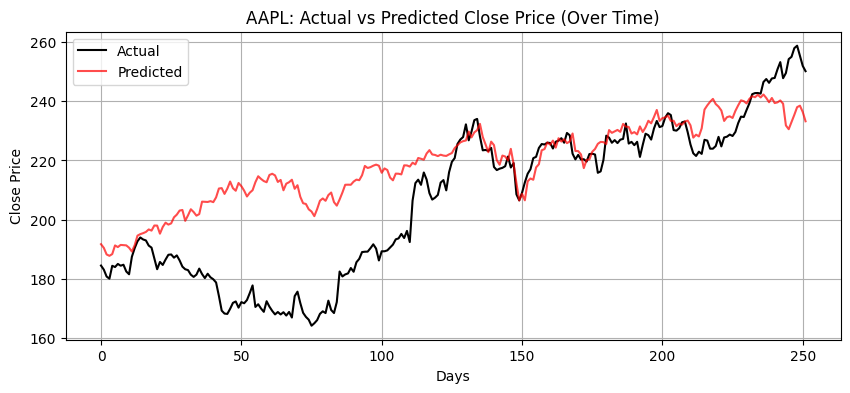

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_scaled_close.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.5):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1)
        self.fc = nn.Linear(hidden_channels, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.elu(self.gat1(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        x = F.elu(self.gat2(x, edge_index))
        x = self.dropout(x) # Apply dropout after activation
        return self.fc(x)  # shape: [num_nodes, 1]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=1, hidden_channels=16, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
    return total_loss / len(loader)


for epoch in range(20):
    train_loss = train()
    test_loss = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

Try best spy on aapl.

Epoch 01 | Train Loss: 0.0070 | Test Loss: 0.0165
Epoch 02 | Train Loss: 0.0035 | Test Loss: 0.0117
Epoch 03 | Train Loss: 0.0021 | Test Loss: 0.0066
Epoch 04 | Train Loss: 0.0017 | Test Loss: 0.0061
Epoch 05 | Train Loss: 0.0013 | Test Loss: 0.0067
Epoch 06 | Train Loss: 0.0013 | Test Loss: 0.0054
Epoch 07 | Train Loss: 0.0012 | Test Loss: 0.0054
Epoch 08 | Train Loss: 0.0011 | Test Loss: 0.0052
Epoch 09 | Train Loss: 0.0010 | Test Loss: 0.0052
Epoch 10 | Train Loss: 0.0010 | Test Loss: 0.0052
Epoch 11 | Train Loss: 0.0011 | Test Loss: 0.0055
Epoch 12 | Train Loss: 0.0010 | Test Loss: 0.0060
Epoch 13 | Train Loss: 0.0010 | Test Loss: 0.0056
Epoch 14 | Train Loss: 0.0009 | Test Loss: 0.0061
Epoch 15 | Train Loss: 0.0010 | Test Loss: 0.0071
Epoch 16 | Train Loss: 0.0010 | Test Loss: 0.0055
Epoch 17 | Train Loss: 0.0010 | Test Loss: 0.0054
Epoch 18 | Train Loss: 0.0010 | Test Loss: 0.0062
Epoch 19 | Train Loss: 0.0010 | Test Loss: 0.0055
Epoch 20 | Train Loss: 0.0010 | Test Loss: 0.0053


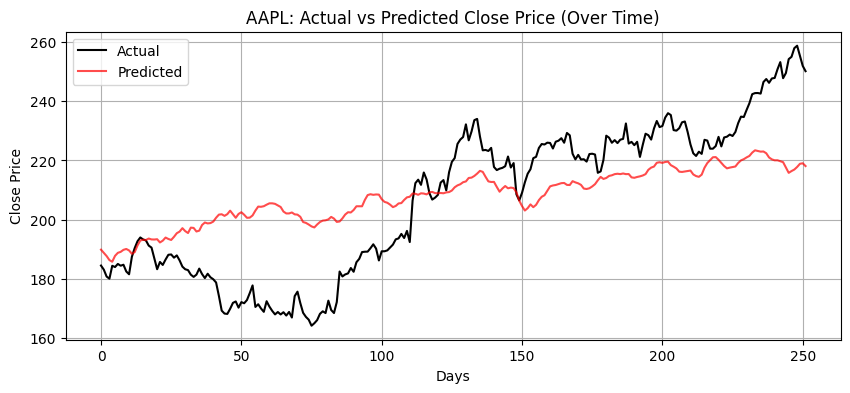

Extracted attention weights for AAPL for 252 time steps.
Shape of attention weights for one time step: torch.Size([79, 4])


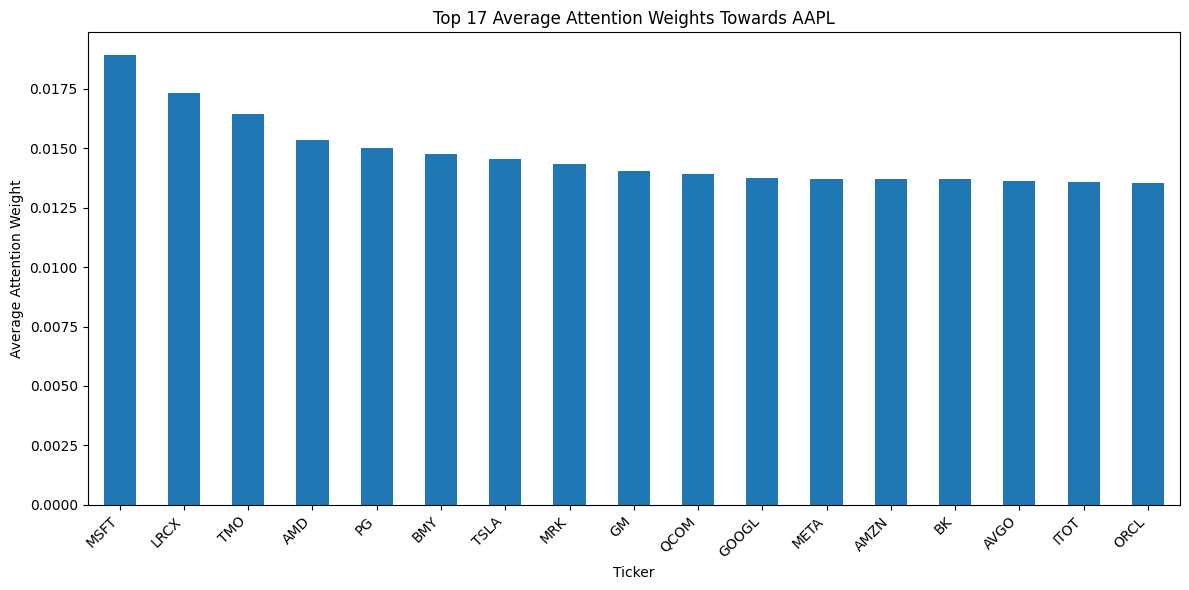

Top 17 tickers by average attention weight towards AAPL:
MSFT     0.018937
LRCX     0.017317
TMO      0.016459
AMD      0.015337
PG       0.015025
BMY      0.014752
TSLA     0.014550
MRK      0.014356
GM       0.014030
QCOM     0.013922
GOOGL    0.013763
META     0.013722
AMZN     0.013709
BK       0.013704
AVGO     0.013613
ITOT     0.013568
ORCL     0.013559
dtype: float32


In [ ]:
# === Model Definition ===
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load Graph Data ===
target_stock = 'AAPL'
graph_list = torch.load(f"graph_list_{target_stock.lower()}_21day_rsimacd.pt", weights_only=False)

test_days = 252
train_graphs = graph_list[:-test_days]
test_graphs = graph_list[-test_days:]

batch_size = 1
train_loader = DataLoader(train_graphs, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=batch_size, shuffle=False)

# === Model Definition ===
class GATPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=4, dropout_prob=0.1):
        super(GATPredictor, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.fc = nn.Linear(hidden_channels * heads, out_channels)  # Predict price for each node
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x, (edge_index_attn, attn_weights_tensor) = self.gat1(
            x, edge_index, return_attention_weights=True
        )
        x = F.elu(x)
        x = self.dropout(x)  # Apply dropout after activation
        output = self.fc(x)  # shape: [num_nodes, 1]
        return output, (edge_index_attn, attn_weights_tensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GATPredictor(in_channels=63, hidden_channels=32, out_channels=1).to(device) # Changed in_channels to 1
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# === Training / Testing ===
def train():
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out, _ = model(data)  # predictions for all nodes, shape [num_nodes, 1]
        out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
        # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
        if out_target_nodes.ndim == 0:
            out_target_nodes = out_target_nodes.unsqueeze(0)
        if data.y.ndim == 0:
            data.y = data.y.unsqueeze(0)
        loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def test(loader):
    model.eval()
    total_loss = 0
    all_attn_weights = []
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out, (edge_index_attn, attn_weights_tensor) = model(data)  # predictions for all nodes, shape [num_nodes, 1]
            out_target_nodes = out[data.target_node_ids].squeeze() # select and squeeze predictions for target nodes, shape [num_targets]
            # Ensure shapes are compatible for MSELoss, unsqueeze if scalar
            if out_target_nodes.ndim == 0:
                out_target_nodes = out_target_nodes.unsqueeze(0)
            if data.y.ndim == 0:
                data.y = data.y.unsqueeze(0)
            loss = loss_fn(out_target_nodes, data.y.to(device)) # compare with actual targets, shape [num_targets]
            total_loss += loss.item()
            all_attn_weights.append((edge_index_attn.cpu(), attn_weights_tensor.cpu())) # Store edge_index and attention_weights_tensor

    return total_loss / len(loader), all_attn_weights


for epoch in range(20):
    train_loss = train()
    test_loss, test_attn_weights = test(test_loader)
    print(f"Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# === Predictions ===
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out, _ = model(data)  # predictions for all nodes
        out_target = out[data.target_node_ids].squeeze().cpu().numpy()
        # Ensure out_target is treated as an iterable even if it's a scalar
        if out_target.ndim == 0:
            out_target = out_target.reshape(1)
        predictions.extend(out_target)
        actuals.extend(data.y.cpu().numpy())

# === Inverse scaling and Metrics ===
aapl_scaler = joblib.load(f'scaler_{target_stock.lower()}.save')

predictions = aapl_scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = aapl_scaler.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
r2 = r2_score(actuals, predictions)

print(f"{target_stock} — RMSE: {rmse:.4f} | MAE: {mae:.4f} | MAPE: {mape:.2f}% | R²: {r2:.4f}")

# === Plotting ===
plt.figure(figsize=(10, 4))
plt.plot(actuals, label="Actual", color='black')
plt.plot(predictions, label="Predicted", color='red', alpha=0.7)
plt.title(f"{target_stock}: Actual vs Predicted Close Price (Over Time)")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Extract attention weights for the target node (AAPL)
target_stock = 'AAPL'
# Assuming 'tickers' list and 'panel' dictionary are available from previous cells
tickers_in_panel = list(panel.keys())
aapl_node_index = tickers_in_panel.index(target_stock)

aapl_attention_weights = []

for edge_index, attn_weights in test_attn_weights:
    # Find edges where the target node is AAPL
    # In a fully connected graph, the target node is in the second row of edge_index
    # and its index is aapl_node_index
    aapl_edges_mask = edge_index[1] == aapl_node_index

    # Get the attention weights for these edges
    weights_to_aapl = attn_weights[aapl_edges_mask]
    aapl_attention_weights.append(weights_to_aapl)

# aapl_attention_weights is a list of tensors, where each tensor contains the attention
# weights from all other nodes towards AAPL for a given time step in the test set.

print(f"Extracted attention weights for {target_stock} for {len(aapl_attention_weights)} time steps.")
# You can inspect the shape of the weights for a single time step
if aapl_attention_weights:
    print(f"Shape of attention weights for one time step: {aapl_attention_weights[0].shape}")


# Calculate average attention weights across the test set
# Assuming aapl_attention_weights is a list of tensors where each tensor is [num_nodes, heads]
# We want to average across the time steps (the list) and potentially across heads

if aapl_attention_weights:
    # Concatenate all attention weight tensors from the list
    all_weights_tensor = torch.cat(aapl_attention_weights, dim=0) # Shape: [num_days * num_nodes, heads]

    # Reshape to [num_days, num_nodes, heads] and average over days
    num_days_test = len(aapl_attention_weights)
    num_nodes = all_weights_tensor.shape[0] // num_days_test
    num_heads = all_weights_tensor.shape[1]

    average_weights_per_node_head = all_weights_tensor.reshape(num_days_test, num_nodes, num_heads).mean(dim=0) # Shape: [num_nodes, heads]

    # Average across heads to get a single weight per node
    average_weights_per_node = average_weights_per_node_head.mean(dim=1) # Shape: [num_nodes]

    # Get the tickers corresponding to the nodes
    # Use tickers_to_process as the index, since the graph was built using these tickers

    # Create a pandas Series for easier sorting and visualization
    average_attention_series = pd.Series(average_weights_per_node.numpy(), index=tickers_in_panel) # Use corrected index

    # Sort the series by attention weight
    sorted_attention = average_attention_series.sort_values(ascending=False)

    # Plot the top N attention weights
    top_n = len(tickers_for_attention) # Adjusted top_n
    plt.figure(figsize=(12, 6))
    sorted_attention.head(top_n).plot(kind='bar')
    plt.title(f"Top {top_n} Average Attention Weights Towards {target_stock}")
    plt.xlabel("Ticker")
    plt.ylabel("Average Attention Weight")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Top {top_n} tickers by average attention weight towards {target_stock}:")
    print(sorted_attention.head(top_n))

else:
    print("No attention weights were extracted.")

MSFT was highest pearsoon r correlation too.

2 models for aapl, one has higher overall error but theres a really good period, other has lower error but looks worse.